In [1493]:
#https://www.kaggle.com/arindam235/startup-investments-crunchbase
#https://support.crunchbase.com/hc/en-us/articles/115010458467-Glossary-of-Funding-Types
#https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-


import pandas as pd
import numpy as np

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
 
from IPython.display import Image  
import pydotplus
import graphviz
from six import StringIO

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO 

from pydot import graph_from_dot_data
from sklearn.utils import resample

%matplotlib inline

In [1169]:
df = pd.read_csv("investments_VC.csv")

In [1170]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1171]:
df.head().T

,0,1,2,3,4
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine
homepage_url,http://www.waywire.com,http://enjoyandtv.com,http://www.rockyourpaper.org,http://www.InTouchNetwork.com,NaN
category_list,|Entertainment|Politics|Social Media|News|,|Games|,|Publishing|Education|,|Electronics|Guides|Coffee|Restaurants|Music|i...,|Tourism|Entertainment|Games|
market,News,Games,Publishing,Electronics,Tourism
funding_total_usd,"17,50,000","40,00,000","40,000","15,00,000","60,000"
status,acquired,operating,operating,operating,operating
country_code,USA,USA,EST,GBR,USA
state_code,NY,CA,NaN,NaN,TX
region,New York City,Los Angeles,Tallinn,London,Dallas


In [1172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [1173]:
df.shape

(54294, 39)

In [1174]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [1175]:
df.isin([0]).sum()

permalink                   0
name                        0
homepage_url                0
category_list               0
 market                     0
 funding_total_usd          0
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
founded_month               0
founded_quarter             0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                    35598
venture                 26161
equity_crowdfunding     48916
undisclosed             48486
convertible_note        48881
debt_financing          45213
angel                   46309
grant                   48296
private_equity          48065
post_ipo_equity         49122
post_ipo_debt           49363
secondary_market        49419
product_crowdfunding    49225
round_A                 40435
round_B                 43991
round_C   

In [1176]:
df.count()

permalink               49438
name                    49437
homepage_url            45989
category_list           45477
 market                 45470
 funding_total_usd      49438
status                  48124
country_code            44165
state_code              30161
region                  44165
city                    43322
funding_rounds          49438
founded_at              38554
founded_month           38482
founded_quarter         38482
founded_year            38482
first_funding_at        49438
last_funding_at         49438
seed                    49438
venture                 49438
equity_crowdfunding     49438
undisclosed             49438
convertible_note        49438
debt_financing          49438
angel                   49438
grant                   49438
private_equity          49438
post_ipo_equity         49438
post_ipo_debt           49438
secondary_market        49438
product_crowdfunding    49438
round_A                 49438
round_B                 49438
round_C   

In [1178]:
df.nunique()# permalink has the highest number of unique values, this is agood indicator that it would good to use it as a unique ID

permalink               49436
name                    49350
homepage_url            45850
category_list           16675
 market                   753
 funding_total_usd      14617
status                      3
country_code              115
state_code                 61
region                   1089
city                     4188
funding_rounds             17
founded_at               3369
founded_month             420
founded_quarter           218
founded_year              103
first_funding_at         3914
last_funding_at          3657
seed                     3337
venture                  9300
equity_crowdfunding       252
undisclosed               687
convertible_note          299
debt_financing           1872
angel                     999
grant                     532
private_equity            847
post_ipo_equity           239
post_ipo_debt              57
secondary_market           20
product_crowdfunding      176
round_A                  2035
round_B                  1269
round_C   

In [1179]:
(df.isin([0]).sum()/df.count()) *100 # some of the columns have a lot of zeros

permalink                0.000000
name                     0.000000
homepage_url             0.000000
category_list            0.000000
 market                  0.000000
 funding_total_usd       0.000000
status                   0.000000
country_code             0.000000
state_code               0.000000
region                   0.000000
city                     0.000000
funding_rounds           0.000000
founded_at               0.000000
founded_month            0.000000
founded_quarter          0.000000
founded_year             0.000000
first_funding_at         0.000000
last_funding_at          0.000000
seed                    72.005340
venture                 52.916785
equity_crowdfunding     98.944132
undisclosed             98.074356
convertible_note        98.873336
debt_financing          91.453942
angel                   93.670860
grant                   97.690036
private_equity          97.222784
post_ipo_equity         99.360816
post_ipo_debt           99.848295
secondary_mark

In [1180]:
df['status'].unique()

array(['acquired', 'operating', nan, 'closed'], dtype=object)

In [1182]:
df.groupby('status')['name'].nunique() #a lot of operating values in the dataset

status
acquired      3691
closed        2602
operating    41762
Name: name, dtype: int64

In [1184]:
df['country_code'].unique() # lot fo different countries

array(['USA', 'EST', 'GBR', 'ARG', nan, 'HKG', 'CHL', 'DEU', 'FRA', 'CHN',
       'CAN', 'AUS', 'ROM', 'NLD', 'SWE', 'RUS', 'DNK', 'IND', 'SGP',
       'NOR', 'BEL', 'IRL', 'ITA', 'ISR', 'ESP', 'THA', 'NZL', 'CZE',
       'CHE', 'BRA', 'HUN', 'JPN', 'BWA', 'KOR', 'NGA', 'FIN', 'TUR',
       'CRI', 'PRT', 'TWN', 'KHM', 'COL', 'UKR', 'LTU', 'ZAF', 'AUT',
       'PHL', 'ISL', 'BGR', 'URY', 'HRV', 'KEN', 'MEX', 'JOR', 'VNM',
       'GHA', 'PER', 'POL', 'IDN', 'PAN', 'LVA', 'ALB', 'UGA', 'LBN',
       'GRC', 'ARE', 'PAK', 'EGY', 'SVK', 'LUX', 'MYS', 'BHS', 'ARM',
       'DZA', 'MDA', 'TUN', 'NIC', 'TZA', 'CYP', 'NPL', 'BHR', 'CMR',
       'SRB', 'SAU', 'CYM', 'BRN', 'SLV', 'ECU', 'MLT', 'SVN', 'LAO',
       'TTO', 'MAR', 'MMR', 'BGD', 'DOM', 'BMU', 'LIE', 'MOZ', 'GTM',
       'AZE', 'MCO', 'ZWE', 'UZB', 'OMN', 'BLR', 'JEY', 'JAM', 'KWT',
       'MUS', 'CIV', 'SOM', 'MKD', 'GIB', 'SYC', 'MAF'], dtype=object)

In [1185]:
df.groupby('country_code')['name'].nunique().sort_values(ascending=False).head(50) # most of the valyes are from USA 

country_code
USA    28756
GBR     2642
CAN     1405
CHN     1238
DEU      966
FRA      866
IND      849
ISR      681
ESP      549
RUS      368
SWE      315
AUS      314
ITA      308
NLD      307
IRL      306
SGP      299
BRA      293
CHL      285
JPN      283
KOR      246
CHE      222
DNK      210
FIN      194
ARG      149
BEL      149
HKG      126
TUR      124
AUT      103
NOR       98
POL       94
MEX       83
PRT       69
BGR       68
ARE       66
NZL       62
ZAF       52
IDN       52
CZE       51
MYS       48
UKR       45
EST       44
TWN       41
HUN       41
THA       38
COL       35
PHL       32
LTU       31
GRC       31
PER       29
NGA       29
Name: name, dtype: int64

In [1186]:
df[df['status'].isin(['acquired'])].mean()

funding_rounds          2.013814e+00
founded_year            2.003798e+03
seed                    1.783670e+05
venture                 1.385521e+07
equity_crowdfunding     2.406028e+03
undisclosed             1.559854e+05
convertible_note        6.423306e+03
debt_financing          1.905123e+06
angel                   6.677897e+04
grant                   2.570494e+04
private_equity          2.637853e+06
post_ipo_equity         1.611554e+06
post_ipo_debt           3.093987e+05
secondary_market        2.464789e+02
product_crowdfunding    7.313109e+02
round_A                 2.174661e+06
round_B                 3.425453e+06
round_C                 2.729664e+06
round_D                 1.539313e+06
round_E                 5.004732e+05
round_F                 1.511213e+05
round_G                 2.315818e+04
round_H                 0.000000e+00
dtype: float64

In [1187]:
df[df['status'].isin(['closed'])].mean()

funding_rounds          1.434114e+00
founded_year            2.007276e+03
seed                    1.415031e+05
venture                 5.212253e+06
equity_crowdfunding     0.000000e+00
undisclosed             3.732560e+04
convertible_note        1.012430e+04
debt_financing          6.263045e+05
angel                   7.328595e+04
grant                   5.857066e+04
private_equity          5.576029e+05
post_ipo_equity         3.033922e+05
post_ipo_debt           0.000000e+00
secondary_market        2.821279e+03
product_crowdfunding    1.037265e+01
round_A                 1.064018e+06
round_B                 1.214834e+06
round_C                 6.584350e+05
round_D                 2.839396e+05
round_E                 2.428813e+05
round_F                 1.730695e+05
round_G                 1.920861e+04
round_H                 0.000000e+00
dtype: float64

In [1188]:
df[df['status'].isin(['operating'])].mean()

funding_rounds          1.689522e+00
founded_year            2.007723e+03
seed                    2.275289e+05
venture                 7.194281e+06
equity_crowdfunding     6.984983e+03
undisclosed             1.304164e+05
convertible_note        2.587812e+04
debt_financing          1.989447e+06
angel                   6.554313e+04
grant                   1.811988e+05
private_equity          2.129350e+06
post_ipo_equity         5.075855e+05
post_ipo_debt           4.409116e+05
secondary_market        4.514165e+04
product_crowdfunding    8.176997e+03
round_A                 1.189144e+06
round_B                 1.361950e+06
round_C                 1.132962e+06
round_D                 7.145365e+05
round_E                 3.433617e+05
round_F                 1.763014e+05
round_G                 6.492200e+04
round_H                 1.682087e+04
dtype: float64

In [162]:
df.isnull().sum() # dataset also has some null values. Some of the columns have a lot of null values eg state code and founded years

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [1189]:
df.isnull().sum()/df.count() *100 #around 40% of the data does not have a founded date. City, region, state also have high number of null values so it would be good to leave these columns

permalink                9.822404
name                     9.824625
homepage_url            18.058666
category_list           19.387822
 market                 19.406202
 funding_total_usd       9.822404
status                  12.821046
country_code            22.934450
state_code              80.013925
region                  22.934450
city                    25.326624
funding_rounds           9.822404
founded_at              40.825855
founded_month           41.089340
founded_quarter         41.089340
founded_year            41.089340
first_funding_at         9.822404
last_funding_at          9.822404
seed                     9.822404
venture                  9.822404
equity_crowdfunding      9.822404
undisclosed              9.822404
convertible_note         9.822404
debt_financing           9.822404
angel                    9.822404
grant                    9.822404
private_equity           9.822404
post_ipo_equity          9.822404
post_ipo_debt            9.822404
secondary_mark

In [1190]:
# some of the columns have space in front so cleaning it
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

In [1191]:
# the funding total column is read as a object so clearning it up so that we can use it as a numerical column
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','')
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0')

In [1193]:
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])# turning to number

In [1194]:
#turning all date columns in to date
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce')
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df['founded_year'] =  pd.to_datetime(df['founded_year'], format='%Y', errors = 'coerce')
df['founded_month'] =  pd.to_datetime(df['founded_month'], format='%Y-%m', errors = 'coerce')

In [1195]:
df[['founded_at', 'first_funding_at', 'last_funding_at', 'founded_year', 'founded_month', 'founded_quarter']]

,founded_at,first_funding_at,last_funding_at,founded_year,founded_month,founded_quarter
0,2012-06-01,2012-06-30,2012-06-30,2012-01-01,2012-06-01,2012-Q2
1,NaT,2010-06-04,2010-09-23,NaT,NaT,NaN
2,2012-10-26,2012-08-09,2012-08-09,2012-01-01,2012-10-01,2012-Q4
3,2011-04-01,2011-04-01,2011-04-01,2011-01-01,2011-04-01,2011-Q2
4,2014-01-01,2014-08-17,2014-09-26,2014-01-01,2014-01-01,2014-Q1
...,...,...,...,...,...,...
54289,NaT,NaT,NaT,NaT,NaT,NaN
54290,NaT,NaT,NaT,NaT,NaT,NaN
54291,NaT,NaT,NaT,NaT,NaT,NaN
54292,NaT,NaT,NaT,NaT,NaT,NaN


In [1196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   permalink             49438 non-null  object        
 1   name                  49437 non-null  object        
 2   homepage_url          45989 non-null  object        
 3   category_list         45477 non-null  object        
 4   market                45470 non-null  object        
 5   funding_total_usd     49438 non-null  float64       
 6   status                48124 non-null  object        
 7   country_code          44165 non-null  object        
 8   state_code            30161 non-null  object        
 9   region                44165 non-null  object        
 10  city                  43322 non-null  object        
 11  funding_rounds        49438 non-null  float64       
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

In [1199]:
df.groupby('status')['funding_total_usd'].describe() #acquired companies have higher mean and median funding total comapred to closed and operating. Closed companies have the lowest dunfing total

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.075578e+07,1.079477e+08,0.0,1100000.0,6000000.0,19500000.0,5.700000e+09
closed,2603.0,7.023194e+06,3.888355e+07,0.0,30000.0,500000.0,4000000.0,1.567504e+09
operating,41829.0,1.295244e+07,1.633604e+08,0.0,50000.0,999857.0,6000000.0,3.007950e+10


In [1200]:
df.groupby('status')['funding_rounds'].describe()# acquired companies also has more funding rounds

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.013814,1.398832,1.0,1.0,2.0,3.0,15.0
closed,2603.0,1.434114,0.965478,1.0,1.0,1.0,2.0,11.0
operating,41829.0,1.689522,1.302072,1.0,1.0,1.0,2.0,18.0


In [1201]:
df.groupby('status')['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'].mean().T

/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


status,acquired,closed,operating
funding_rounds,2.013814e+00,1.434114e+00,1.689522e+00
funding_total_usd,2.075578e+07,7.023194e+06,1.295244e+07
seed,1.783670e+05,1.415031e+05,2.275289e+05
venture,1.385521e+07,5.212253e+06,7.194281e+06
equity_crowdfunding,2.406028e+03,0.000000e+00,6.984983e+03
undisclosed,1.559854e+05,3.732560e+04,1.304164e+05
convertible_note,6.423306e+03,1.012430e+04,2.587812e+04
debt_financing,1.905123e+06,6.263045e+05,1.989447e+06
angel,6.677897e+04,7.328595e+04,6.554313e+04
grant,2.570494e+04,5.857066e+04,1.811988e+05


In [1202]:
df.groupby('status')['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'].median().T # median values are not being that useful as there is a lot of zeros in the dataset

/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


status,acquired,closed,operating
funding_rounds,2.0,1.0,1.0
funding_total_usd,6000000.0,500000.0,999857.0
seed,0.0,0.0,0.0
venture,5000000.0,0.0,0.0
equity_crowdfunding,0.0,0.0,0.0
undisclosed,0.0,0.0,0.0
convertible_note,0.0,0.0,0.0
debt_financing,0.0,0.0,0.0
angel,0.0,0.0,0.0
grant,0.0,0.0,0.0


In [1203]:
df.groupby('status')['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'].sum().T #sum of operating companies  are high for all columns as there is more data for acquired comanies. There is no money for acquired and close comanies that went till round G and H

/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


status,acquired,closed,operating
funding_rounds,7.435000e+03,3.733000e+03,7.067100e+04
funding_total_usd,7.663035e+10,1.828137e+10,5.417878e+11
seed,6.585308e+08,3.683325e+08,9.517305e+09
venture,5.115343e+10,1.356749e+10,3.009296e+11
equity_crowdfunding,8.883057e+06,0.000000e+00,2.921749e+08
undisclosed,5.758979e+08,9.715853e+07,5.455188e+09
convertible_note,2.371484e+07,2.635356e+07,1.082456e+09
debt_financing,7.033715e+09,1.630271e+09,8.321657e+10
angel,2.465479e+08,1.907633e+08,2.741604e+09
grant,9.490263e+07,1.524594e+08,7.579363e+09


In [1204]:
df['diff_funding'] = df['last_funding_at'] - df['first_funding_at'] # finding the difference in days between first and last funding dates

In [1205]:
df['diff_funding'].describe() # mean is 312 days which is about 1 year

count                          49428
mean     312 days 11:05:24.253459576
std      624 days 19:13:46.845677584
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                382 days 00:00:00
max              17287 days 00:00:00
Name: diff_funding, dtype: object

In [1206]:
df['diff_funding_months'] = (df['last_funding_at'] - df['first_funding_at'])/np.timedelta64(1, 'M') # turning the difference into months

In [1207]:
df['diff_funding_months'].describe()

count    49428.000000
mean        10.265906
std         20.527772
min          0.000000
25%          0.000000
50%          0.000000
75%         12.550566
max        567.962381
Name: diff_funding_months, dtype: float64

In [1208]:
df['total_investment'] = df['seed'] + df['venture'] + df['equity_crowdfunding'] + df['undisclosed'] + df['convertible_note'] + df['debt_financing'] + df['angel'] + df['grant'] + df['private_equity'] + df['post_ipo_equity'] + df['post_ipo_debt'] + df['secondary_market'] + df['product_crowdfunding']

df['total_investment'].describe() # calculating the total investment for each company

count    4.943800e+04
mean     1.316667e+07
std      1.535540e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.772162e+06
max      3.007950e+10
Name: total_investment, dtype: float64

In [1209]:
df['total_investment'].sum()

650933703144.0

In [1210]:
df['funding_total_usd'].describe()

count    4.943800e+04
mean     1.316667e+07
std      1.535540e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.772162e+06
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [1211]:
df['funding_total_usd'].sum() # confirming that funding total and total investment is the same . we can drop one of the columns

650933703144.0

In [1212]:
df.groupby('market')['funding_total_usd'].sum().sort_values(ascending = False).head(5)#top 5  markets with the most funding

market
 Biotechnology        7.337295e+10
 Mobile               4.947011e+10
 Software             4.222348e+10
 Clean Technology     3.761994e+10
 Health Care          2.946608e+10
Name: funding_total_usd, dtype: float64

In [1213]:
df.groupby('market')['name'].count().sort_values(ascending = False).head(5) #Top five markets in terms of count

market
 Software          4620
 Biotechnology     3688
 Mobile            1983
 E-Commerce        1805
 Curated Web       1655
Name: name, dtype: int64

In [1214]:
df['region'].unique()

array(['New York City', 'Los Angeles', 'Tallinn', ..., 'Jodhpur',
       'Muenchen', 'Buckinghamshire'], dtype=object)

In [1215]:
df.groupby('region')['name'].count().sort_values(ascending = False).head(10) # top 10 regions. There is a lot from main cities like SF, NYC, Boston, London

region
SF Bay Area         6804
New York City       2577
Boston              1837
London              1588
Los Angeles         1389
Seattle              932
Washington, D.C.     785
Chicago              749
San Diego            700
Denver               636
Name: name, dtype: int64

In [1216]:
df.groupby('founded_year')['name'].count().sort_values(ascending = False).head(10) #Lot of the companies are recently founded

founded_year
2012-01-01    5211
2011-01-01    4904
2013-01-01    4044
2010-01-01    3773
2009-01-01    2979
2008-01-01    2348
2007-01-01    2331
2006-01-01    1807
2014-01-01    1469
2005-01-01    1418
Name: name, dtype: int64

In [1219]:
df.groupby('founded_year')['name'].count().sort_values(ascending = False).tail(10) # there are some companies that are founded very long time ago

founded_year
1920-01-01    1
1925-01-01    1
1929-01-01    1
1938-01-01    1
1939-01-01    1
1941-01-01    1
1943-01-01    1
1944-01-01    1
1946-01-01    1
1936-01-01    1
Name: name, dtype: int64

In [1220]:
df['founded_year'].max() # 2014 is the newest year

Timestamp('2014-01-01 00:00:00')

In [1221]:
df['founded_year'].min() # 1902 is the oldest year

Timestamp('1902-01-01 00:00:00')

<AxesSubplot:>

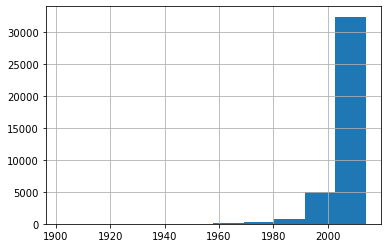

In [1222]:
df['founded_year'].hist()#most of the comapnies are around 2000

In [1223]:
df['diff_first_funding_months'] = (df['first_funding_at'] - df['founded_at'])/np.timedelta64(1, 'M') # calculating how long it took them to get their first funding after being founded

In [1225]:
df['diff_first_funding_months'].describe() #negative values shows that there is a founded date but there is no first funding date. Median is around 17 month and mead is around 46 months. 

count    38547.000000
mean        46.535082
std        111.273323
min       -576.143247
25%          4.993942
50%         17.938767
75%         49.019487
max       2752.385059
Name: diff_first_funding_months, dtype: float64

In [1226]:
df.select_dtypes(include='number').columns # values with number

Index(['funding_total_usd', 'funding_rounds', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'diff_funding', 'diff_funding_months', 'total_investment',
       'diff_first_funding_months'],
      dtype='object')

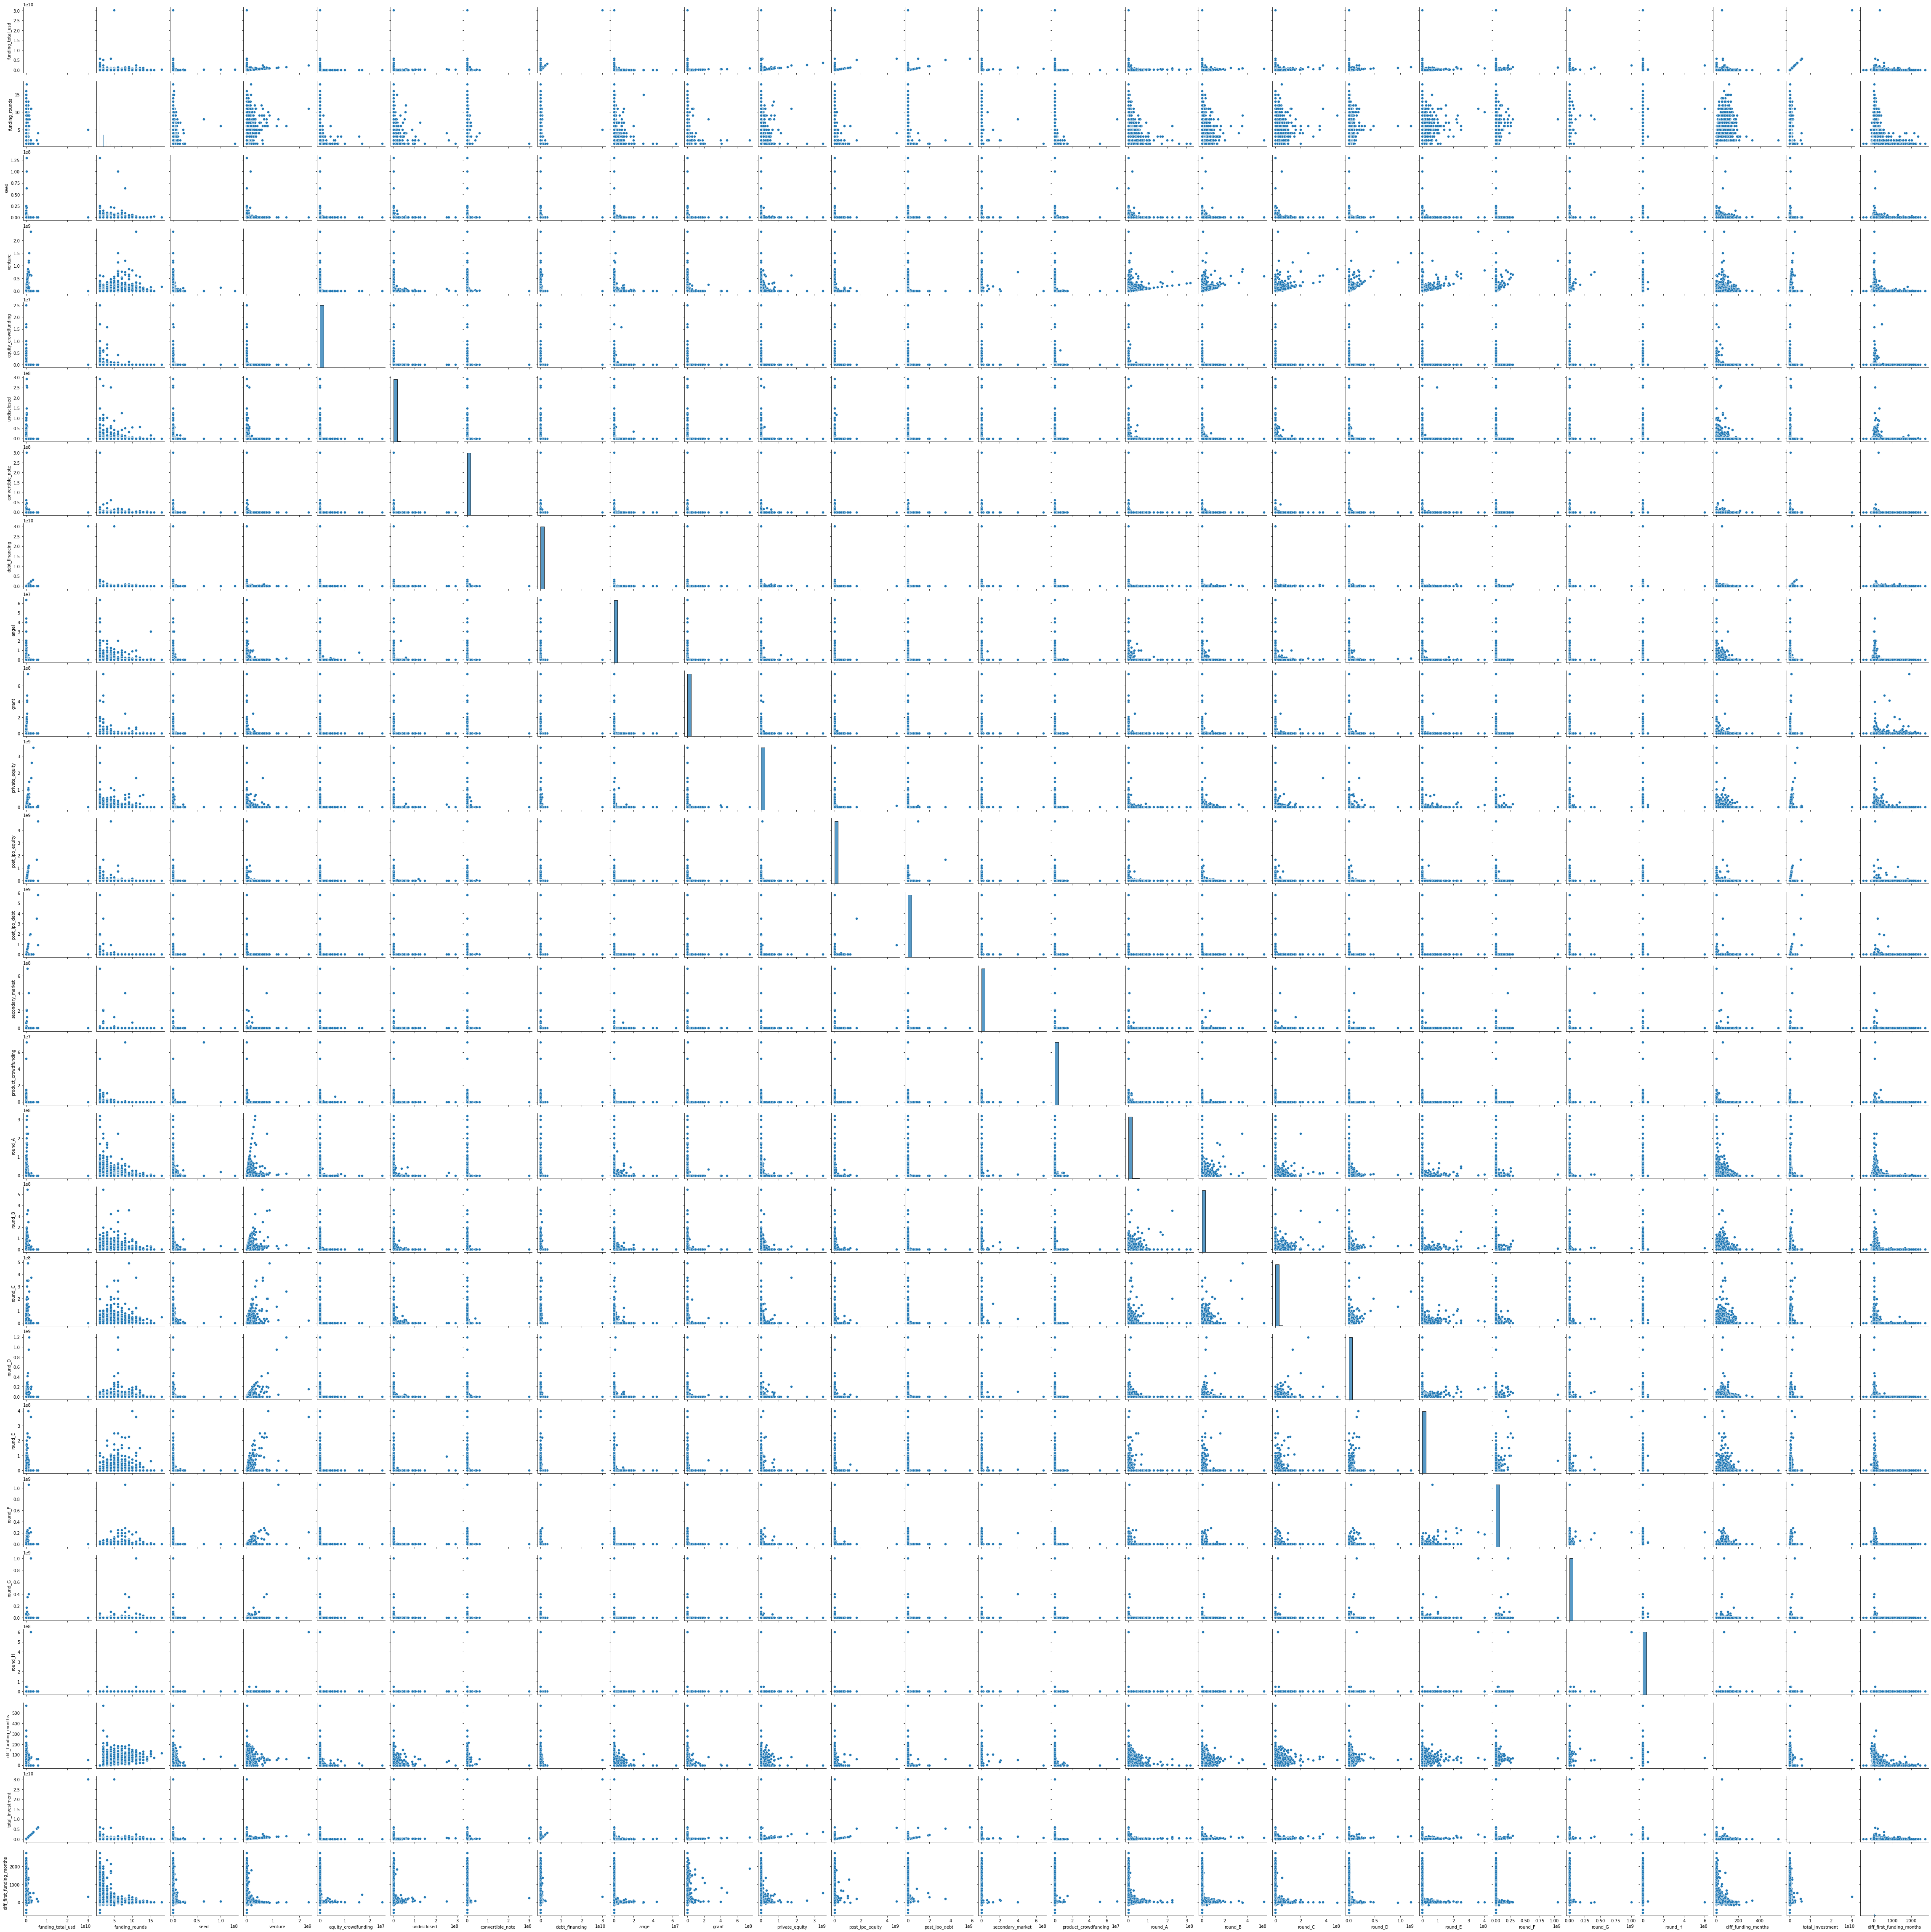

In [1227]:
sns.pairplot(df.select_dtypes(include='number')) # pairplot with columns that has number

In [1228]:
df[df['name'].isnull()].T # dataframe still has a lot of null values

,28221,49438,49439,49440,49441,49442,49443,49444,49445,49446,...,54284,54285,54286,54287,54288,54289,54290,54291,54292,54293
permalink,/organization/tell-it-in,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
name,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
homepage_url,http://tellitin10.com,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
category_list,|Startups|,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
market,Startups,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
funding_total_usd,25000.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
status,closed,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
country_code,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
state_code,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
region,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [1229]:
df1 = df.copy()# copying dataframe

In [1230]:
df1 = df1.drop(columns= ['homepage_url', 'category_list', 'state_code', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 
                    'diff_first_funding_months', 'diff_funding', 'funding_total_usd', 'city', 'region', 'first_funding_at', 'last_funding_at'])#dropping unecessary columns that I dont plan on using

In [1231]:
df1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment'],
      dtype='object')

In [1233]:
df1.isnull().sum() # still a lot of null values

permalink                4856
name                     4857
market                   8824
status                   6170
country_code            10129
funding_rounds           4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C                  4856
round_D                  4856
round_E                  4856
round_F                  4856
round_G                  4856
round_H                  4856
diff_funding_months      4866
total_investment         4856
dtype: int64

In [1234]:
df1 = df1.dropna(subset=['permalink', 'status', 'name', 'market', 'country_code', 'diff_funding_months']) # dropping null values from these columns

In [1235]:
df1.isnull().sum()# checking if there are any null values left

permalink               0
name                    0
market                  0
status                  0
country_code            0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
diff_funding_months     0
total_investment        0
dtype: int64

In [1236]:
df1['market'].nunique() # 736 unique number of market

736

In [1237]:
df1['country_code'].nunique() # 113 country code unique

113

In [1238]:
df1.shape

(40471, 29)

In [1239]:
df1.groupby(df1['status'])['permalink'].count()

status
acquired      3352
closed        2146
operating    34973
Name: permalink, dtype: int64

In [1240]:
df1.groupby(df1['market'])['permalink'].count().sort_values(ascending = False).head(50) #top 50 markets

market
 Software                 4241
 Biotechnology            3458
 Mobile                   1702
 E-Commerce               1529
 Curated Web              1397
 Enterprise Software      1192
 Health Care              1129
 Clean Technology         1077
 Games                    1017
 Hardware + Software      1008
 Advertising               943
 Health and Wellness       849
 Education                 767
 Finance                   767
 Social Media              728
 Manufacturing             654
 Analytics                 563
 Security                  479
 Semiconductors            462
 Consulting                452
 Hospitality               421
 Web Hosting               404
 Real Estate               358
 Fashion                   344
 News                      333
 Travel                    313
 Messaging                 259
 Search                    251
 Medical                   249
 Music                     241
 SaaS                      235
 Technology                231
 

In [1241]:
df1.groupby(df1['country_code'])['permalink'].count().sort_values(ascending = False).head(50) # top 50 countries

country_code
USA    26545
GBR     2459
CAN     1280
CHN     1198
DEU      904
IND      800
FRA      788
ISR      656
ESP      509
SWE      296
IRL      277
AUS      276
NLD      273
ITA      270
SGP      267
JPN      242
BRA      242
CHL      219
KOR      205
CHE      201
RUS      199
FIN      177
DNK      177
BEL      145
ARG      130
TUR      116
HKG      111
AUT       97
NOR       92
POL       88
BGR       65
MEX       63
ARE       59
PRT       59
NZL       58
ZAF       50
CZE       47
MYS       47
IDN       47
EST       43
TWN       40
UKR       38
HUN       37
THA       36
PHL       31
GRC       31
LTU       29
COL       27
NGA       26
ROM       22
Name: permalink, dtype: int64

In [1242]:
df1.groupby(df1['diff_funding_months'])['permalink'].count().sort_values(ascending = False).head(50) #top 50 difference in funding months. Most of the dataset have 0 months

diff_funding_months
0.000000     24728
11.992033       93
5.026797        43
7.983737        37
13.010534       36
14.029036       35
3.022649        35
9.987885        35
24.016920       32
23.984065       32
13.996181       31
4.008296        31
5.946734        31
15.014682       30
11.006386       30
12.024888       29
18.990123       29
10.973531       28
8.969383        28
1.018501        28
16.033183       27
4.961087        27
7.589478        26
16.000329       26
14.981827       26
6.965235        25
17.938767       25
8.016592        25
12.977679       25
6.045299        24
9.002238        24
7.030945        23
2.004148        23
20.961416       23
10.020740       23
8.049447        23
16.657426       22
6.998090        22
9.955030        22
13.109099       22
10.053595       22
12.419146       22
7.950882        22
6.012444        21
17.018830       21
19.975770       21
11.959178       21
22.998419       21
20.994271       21
25.035422       20
Name: permalink, dtype: int64

In [1243]:
df1['diff_funding_year'] = round(df1['diff_funding_months']/12) # making new column that has difference in funding in year

In [1244]:
df1.groupby(df1['diff_funding_year'])['permalink'].count().sort_values(ascending = False).head(50) #There are not that many companies that has more than 13 year difference in funding

diff_funding_year
0.0     26349
1.0      4611
2.0      3443
3.0      2156
4.0      1500
5.0       982
6.0       566
7.0       377
8.0       207
9.0       133
10.0       54
11.0       37
12.0       22
13.0       14
15.0        7
14.0        4
16.0        3
17.0        2
18.0        1
23.0        1
28.0        1
47.0        1
Name: permalink, dtype: int64

In [1245]:
df1.market = df1.market.str.strip() #removing space from beginnning and end of column

In [1246]:
print(df1['market'].nunique())
print(df1['country_code'].nunique())

736
113


In [1247]:
df1.groupby(df1['market'])['permalink'].count().reset_index().sort_values(by = ['market'],ascending = True).head(50)

,market,permalink
0,3D,18
1,3D Printing,9
2,3D Technology,7
3,Accounting,17
4,Ad Targeting,12
5,Advanced Materials,2
6,Adventure Travel,4
7,Advertising,943
8,Advertising Exchanges,2
9,Advertising Networks,2


In [1248]:
# grouping markets in industries to decrease the number of segments. The list was being taken from here https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [1249]:
#Making new column called  Industry group
df1['Industry_Group'] = pd.np.where(df1.market.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               pd.np.where(df1.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               pd.np.where(df1.market.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               pd.np.where(df1.market.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               pd.np.where(df1.market.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               pd.np.where(df1.market.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               pd.np.where(df1.market.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               pd.np.where(df1.market.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               pd.np.where(df1.market.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               pd.np.where(df1.market.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               pd.np.where(df1.market.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               pd.np.where(df1.market.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               pd.np.where(df1.market.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               pd.np.where(df1.market.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               pd.np.where(df1.market.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               pd.np.where(df1.market.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               pd.np.where(df1.market.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               pd.np.where(df1.market.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               pd.np.where(df1.market.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               pd.np.where(df1.market.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               pd.np.where(df1.market.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               pd.np.where(df1.market.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                               pd.np.where(df1.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               pd.np.where(df1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               pd.np.where(df1.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               pd.np.where(df1.market.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               pd.np.where(df1.market.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               pd.np.where(df1.market.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               pd.np.where(df1.market.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               pd.np.where(df1.market.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               pd.np.where(df1.market.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               pd.np.where(df1.market.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               pd.np.where(df1.market.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               pd.np.where(df1.market.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               pd.np.where(df1.market.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               pd.np.where(df1.market.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               pd.np.where(df1.market.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               pd.np.where(df1.market.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               pd.np.where(df1.market.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               pd.np.where(df1.market.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               pd.np.where(df1.market.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               pd.np.where(df1.market.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               pd.np.where(df1.market.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               pd.np.where(df1.market.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               pd.np.where(df1.market.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               pd.np.where(df1.market.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               pd.np.where(df1.market.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directl

In [1250]:
df1['Industry_Group'].unique() #Industry groups unique values

array(['Content and Publishing', 'Gaming', 'Consumer Electronics',
       'Travel and Tourism', 'Advertising', 'Software',
       'Commerce and Shopping', 'Health Care', 'Real Estate', 'Education',
       'Internet Services', 'Food and Beverage',
       'Media and Entertainment', 'Data and Analytics',
       'Clothing and Apparel', 'Other', 'Biotechnology',
       'Community and Lifestyle', 'Sports', 'Mobile', 'Manufacturing',
       'Design', 'Financial Services', 'Messaging and Telecommunication',
       'Information Technology', 'Professional Services',
       'Administrative Services', 'Navigation and Mapping',
       'Transportation', 'Hardware', 'Privacy and Security',
       'Sales and Marketing', 'Natural Resources', 'Consumer Goods',
       'Events', 'Energy', 'Platforms', 'Apps', 'Science and Engineering',
       'Government and Military', 'Agriculture and Farming',
       'Sustainability', 'Artificial Intelligence'], dtype=object)

In [1251]:
df1['Industry_Group'].nunique() # number of industry groups

43

In [1253]:
df1.groupby(by = ['Industry_Group', 'market']).count().head()# checking what markets is included in the industry group column

permalink  name  status  \
Industry_Group          market                                          
Administrative Services B2B Express Delivery          1     1       1   
                        College Recruiting            3     3       3   
                        Content Delivery              9     9       9   
                        Corporate IT                  4     4       4   
                        Distribution                 14    14      14   

                                              country_code  funding_rounds  \
Industry_Group          market                                               
Administrative Services B2B Express Delivery             1               1   
                        College Recruiting               3               3   
                        Content Delivery                 9               9   
                        Corporate IT                     4               4   
                        Distribution                    14              14   

                                              seed  venture  \
Industry_Group          market                                
Administrative Services B2B Express Delivery     1        1   
                        College Recruiting       3        3   
                        Content Delivery         9        9   
                        Corporate IT             4        4   
                        Distribution            14       14   

                                              equity_crowdfunding  \
Industry_Group          market                                      
Administrative Services B2B Express Delivery                    1   
                        College Recruiting                      3   
                        Content Delivery                        9   
                        Corporate IT                            4   
                        Distribution                           14   

                                              undisclosed  convertible_note  \
Industry_Group          market                                                
Administrative Services B2B Express Delivery            1                 1   
                        College Recruiting              3                 3   
                        Content Delivery                9                 9   
                        Corporate IT                    4                 4   
                        Distribution                   14                14   

                                              ...  round_B  round_C  round_D  \
Industry_Group          market                ...                              
Administrative Services B2B Express Delivery  ...        1        1        1   
                        College Recruiting    ...        3        3        3   
                        Content Delivery      ...        9        9        9   
                        Corporate IT          ...        4        4        4   
                        Distribution          ...       14       14       14   

                                              round_E  round_F  round_G  \
Industry_Group          market                                            
Administrative Services B2B Express Delivery        1        1        1   
                        College Recruiting          3        3        3   
                        Content Delivery            9        9        9   
                        Corporate IT                4        4        4   
                        Distribution               14       14       14   

                                              round_H  diff_funding_months  \
Industry_Group          market                                               
Administrative Services B2B Express Delivery        1                    1   
                        College Recruiting          3                    3   
                        Content Delivery            9                    9   
                        Corpor

In [1254]:
df1[df1['Industry_Group'].isin(['Other'])]['market'].unique()# checking what fell in the Other group  aand if we can transfer to some of the other groups

array(['Mobility', 'Carbon', 'Small and Medium Businesses', 'Nonprofits',
       'Incentives', 'Mass Customization', 'Collaboration',
       'Trusted Networks', 'Real Time', 'RIM', 'Consumers',
       'Crowdsourcing', 'Craigslist Killers', 'Enterprises', 'Non Profit',
       'Subscription Businesses', 'Genetic Testing', 'Testing',
       'Distributed Generation', 'Angels', 'Defense', 'Monetization',
       'Peer-to-Peer', 'Charity', 'Collaborative Consumption',
       'High Tech', 'B2B', 'Infrastructure', 'Gold',
       'General Public Worldwide', 'Licensing', 'World Domination',
       'Moneymaking', 'Emerging Markets', 'Bridging Online and Offline',
       'All Markets', 'Auto', 'Motors', 'Interest Graph',
       'Synchronization', 'Usability', 'Registrars', 'Freemium',
       'Enterprise Resource Planning', 'Exercise', 'Kinect', 'Surveys',
       'Rapidly Expanding', 'Mechanical Solutions', 'Bicycles',
       'Telephony', 'Families', 'Archiving', 'Offline Businesses',
       'Lotter

In [1255]:
df1.groupby(by = ['Industry_Group'])['permalink'].count().sort_values(ascending = False)#Software still is the most

Industry_Group
Software                           8069
Biotechnology                      3494
Health Care                        2975
Internet Services                  2646
Commerce and Shopping              2267
Information Technology             1983
Mobile                             1800
Community and Lifestyle            1610
Advertising                        1548
Financial Services                 1265
Media and Entertainment            1234
Gaming                             1184
Professional Services               970
Education                           927
Data and Analytics                  911
Content and Publishing              815
Other                               796
Manufacturing                       690
Real Estate                         561
Privacy and Security                536
Sales and Marketing                 529
Transportation                      485
Travel and Tourism                  406
Clothing and Apparel                357
Consumer Electronics     

In [1256]:
df1.groupby(by = ['Industry_Group', 'status'])['permalink'].count().sort_values(ascending = True).reset_index().head(50)

,Industry_Group,status,permalink
0,Sustainability,acquired,1
1,Science and Engineering,acquired,1
2,Food and Beverage,closed,1
3,Messaging and Telecommunication,closed,2
4,Administrative Services,closed,2
5,Sustainability,closed,2
6,Apps,acquired,2
7,Artificial Intelligence,operating,2
8,Government and Military,acquired,2
9,Energy,closed,3


<AxesSubplot:>

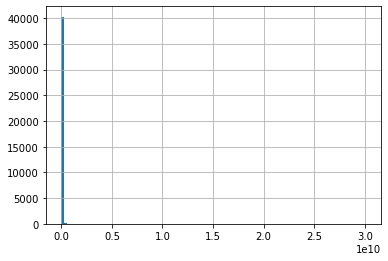

In [1257]:
df1['total_investment'].hist(bins = 100)

In [1258]:
df1['country_code'].unique()

array(['USA', 'EST', 'GBR', 'ARG', 'HKG', 'CHL', 'DEU', 'FRA', 'CHN',
       'CAN', 'AUS', 'ROM', 'NLD', 'SWE', 'DNK', 'IND', 'SGP', 'IRL',
       'ITA', 'ISR', 'ESP', 'THA', 'RUS', 'NZL', 'BEL', 'CZE', 'CHE',
       'BRA', 'HUN', 'JPN', 'BWA', 'KOR', 'NGA', 'FIN', 'TUR', 'CRI',
       'PRT', 'TWN', 'COL', 'NOR', 'UKR', 'LTU', 'ZAF', 'AUT', 'PHL',
       'ISL', 'BGR', 'HRV', 'JOR', 'VNM', 'GHA', 'PER', 'POL', 'IDN',
       'LVA', 'ALB', 'UGA', 'LBN', 'KHM', 'GRC', 'ARE', 'PAK', 'EGY',
       'SVK', 'LUX', 'MYS', 'MEX', 'BHS', 'ARM', 'MDA', 'DZA', 'TUN',
       'NIC', 'TZA', 'CYP', 'KEN', 'NPL', 'BHR', 'CMR', 'SRB', 'SAU',
       'CYM', 'BRN', 'SLV', 'PAN', 'ECU', 'MLT', 'SVN', 'TTO', 'MMR',
       'BGD', 'DOM', 'BMU', 'MAR', 'URY', 'LIE', 'GTM', 'AZE', 'MCO',
       'ZWE', 'UZB', 'OMN', 'BLR', 'JAM', 'KWT', 'MUS', 'CIV', 'SOM',
       'MKD', 'GIB', 'SYC', 'MAF', 'LAO'], dtype=object)

In [1259]:
country = pd.read_csv('country.csv') # uploading dataset to map countyr code to continent
country = country[['Continent_Name', 'Three_Letter_Country_Code', 'Country_Name']]
country = country.dropna(how='any',axis=0) 
country.isnull().sum() # checking if there is null values

Continent_Name               0
Three_Letter_Country_Code    0
Country_Name                 0
dtype: int64

In [1260]:
df1 = df1.merge(country, left_on='country_code', right_on='Three_Letter_Country_Code')# merging both datasets and creating new column called continent
df1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment', 'diff_funding_year',
       'Industry_Group', 'Continent_Name', 'Three_Letter_Country_Code',
       'Country_Name'],
      dtype='object')

In [1261]:
df1.groupby(by = ['Continent_Name'])['permalink'].count() # North America is the highest

Continent_Name
Africa             175
Asia              4163
Europe            7532
North America    27928
Oceania            334
South America      648
Name: permalink, dtype: int64

In [1262]:
df1.shape

(40780, 34)

array([[<AxesSubplot:title={'center':'funding_rounds'}>,
        <AxesSubplot:title={'center':'seed'}>,
        <AxesSubplot:title={'center':'venture'}>,
        <AxesSubplot:title={'center':'equity_crowdfunding'}>,
        <AxesSubplot:title={'center':'undisclosed'}>],
       [<AxesSubplot:title={'center':'convertible_note'}>,
        <AxesSubplot:title={'center':'debt_financing'}>,
        <AxesSubplot:title={'center':'angel'}>,
        <AxesSubplot:title={'center':'grant'}>,
        <AxesSubplot:title={'center':'private_equity'}>],
       [<AxesSubplot:title={'center':'post_ipo_equity'}>,
        <AxesSubplot:title={'center':'post_ipo_debt'}>,
        <AxesSubplot:title={'center':'secondary_market'}>,
        <AxesSubplot:title={'center':'product_crowdfunding'}>,
        <AxesSubplot:title={'center':'round_A'}>],
       [<AxesSubplot:title={'center':'round_B'}>,
        <AxesSubplot:title={'center':'round_C'}>,
        <AxesSubplot:title={'center':'round_D'}>,
        <AxesSubplot:t

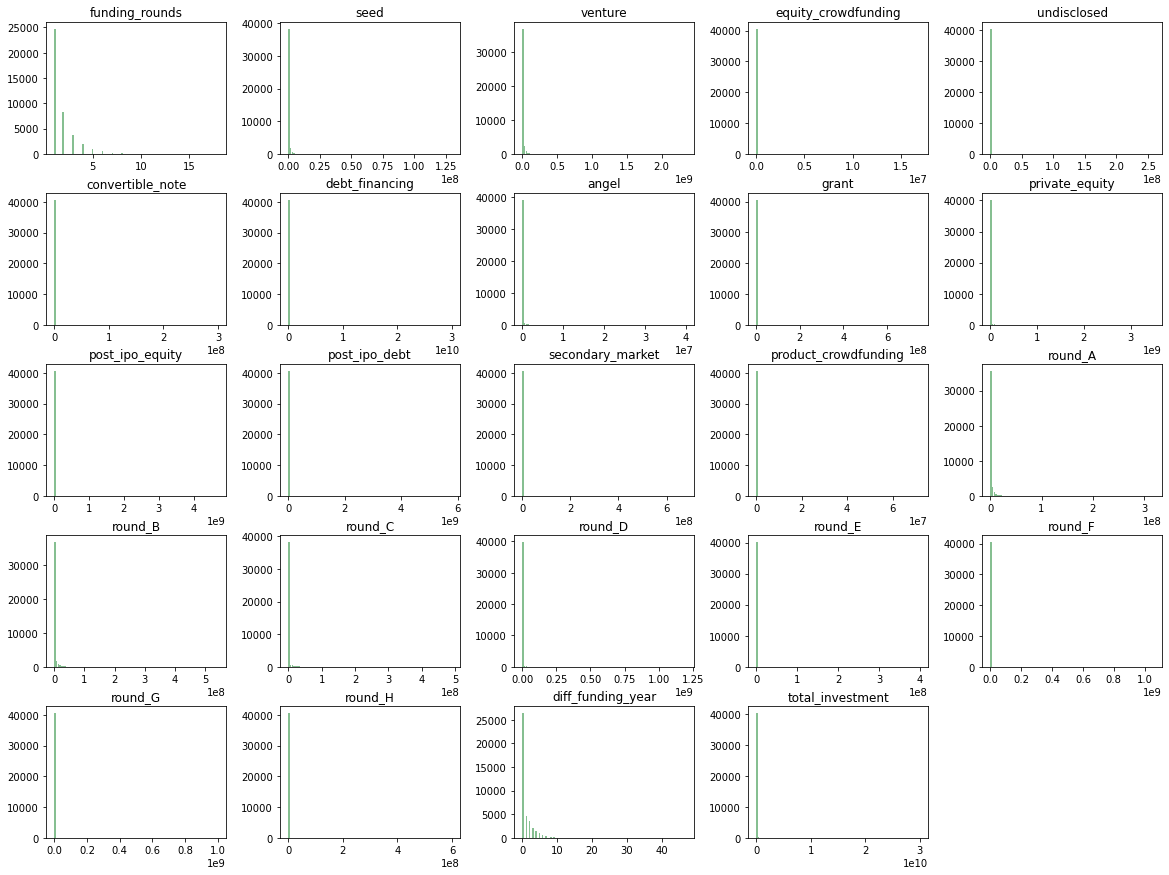

In [1263]:
df1.hist(column=['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment'], bins=100, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9) # creating histogram of all numberical values, all values are very skewed

In [1264]:
df1.isin([0]).sum()# there is still a lot fo zeros

permalink                        0
name                             0
market                           0
status                           0
country_code                     0
funding_rounds                   0
seed                         29564
venture                      19956
equity_crowdfunding          40329
undisclosed                  40054
convertible_note             40288
debt_financing               36951
angel                        38069
grant                        39842
private_equity               39558
post_ipo_equity              40545
post_ipo_debt                40720
secondary_market             40764
product_crowdfunding         40606
round_A                      32539
round_B                      35651
round_C                      38060
round_D                      39528
round_E                      40280
round_F                      40612
round_G                      40748
round_H                      40776
diff_funding_months          24920
total_investment    

In [1265]:
df1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment', 'diff_funding_year',
       'Industry_Group', 'Continent_Name', 'Three_Letter_Country_Code',
       'Country_Name'],
      dtype='object')

In [1266]:
df2 = df1.copy() # copying the df1

In [1267]:
df2 = df2.drop(['Three_Letter_Country_Code', 'Country_Name', 'diff_funding_months', 'country_code', 'market'], axis=1) # dropping unnecessary columns

In [1268]:
df2[['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment']].describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,40780.0,1.791246e+00,1.368332e+00,1.0,1.0,1.0,2.0,1.800000e+01
seed,40780.0,2.357283e+05,1.135971e+06,0.0,0.0,0.0,28000.0,1.300000e+08
venture,40780.0,8.539675e+06,3.075104e+07,0.0,0.0,87000.0,6000000.0,2.351000e+09
equity_crowdfunding,40780.0,5.864530e+03,1.699614e+05,0.0,0.0,0.0,0.0,1.700000e+07
undisclosed,40780.0,1.188045e+05,2.672445e+06,0.0,0.0,0.0,0.0,2.594178e+08
convertible_note,40780.0,2.700989e+04,1.575563e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,40780.0,2.082329e+06,1.512707e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,40780.0,6.824377e+04,5.750587e+05,0.0,0.0,0.0,0.0,4.000000e+07
grant,40780.0,1.805538e+05,6.121722e+06,0.0,0.0,0.0,0.0,7.505000e+08
private_equity,40780.0,2.302964e+06,3.407453e+07,0.0,0.0,0.0,0.0,3.500000e+09


In [1269]:
df2.columns

Index(['permalink', 'name', 'status', 'funding_rounds', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'total_investment', 'diff_funding_year', 'Industry_Group',
       'Continent_Name'],
      dtype='object')

In [1270]:
#creating categories of these numerical values based on the output from the describe data. Also creating new column for the categories
cat_invest = pd.cut(df2.total_investment, bins = [-1, 112500, 1400300, 8205200, 40079503000], labels=['low','low_medium','high_medium','high'])
df2.insert(0,'cat_total_investment',cat_invest)

In [1271]:
cat_diff_funding_year = pd.cut(df2.diff_funding_year, bins = [-1, 2, 49], labels=['low','high'])
df2.insert(0,'cat_diff_funding_year',cat_diff_funding_year)

In [1272]:
cat_funding_rounds = pd.cut(df2.funding_rounds, bins = [-1, 2, 20], labels=['low','high'])
df2.insert(0,'cat_funding_rounds',cat_funding_rounds)

In [1273]:
cat_seed = pd.cut(df2.seed, bins = [-1, 28000, 140000000], labels=['low','high'])
df2.insert(0,'cat_seed',cat_seed)

In [1274]:
cat_venture = pd.cut(df2.venture, bins = [-1, 85038.5, 6000000, 2451000000], labels=['low','medium','high'])
df2.insert(0,'cat_venture',cat_venture)

In [1275]:
# fixing the categorical columns  into numerical values so that we can use it on the model
df2['cat_status'] = df2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
df2['cat_total_investment'] = df2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
df2['cat_diff_funding_year'] = df2['cat_diff_funding_year'].replace(['low', 'high'], [0, 1])
df2['cat_funding_rounds'] = df2['cat_funding_rounds'].replace(['low', 'high'], [0, 1])
df2['cat_seed'] = df2['cat_seed'].replace(['low', 'high'], [0, 1])
df2['cat_venture'] = df2['cat_venture'].replace(['low','medium','high'], [0, 1, 3])

In [1276]:
#as a lot fo the money columns have 0, we are turning them into new categories of 0 and 1
df2.loc[df2['equity_crowdfunding'] < 1, 'cat_equity_crowdfunding'] = 0
df2.loc[df2['equity_crowdfunding'] > 1, 'cat_equity_crowdfunding'] = 1


df2.loc[df2['undisclosed'] < 1, 'cat_undisclosed'] = 0
df2.loc[df2['undisclosed'] > 1, 'cat_undisclosed'] = 1


df2.loc[df2['convertible_note'] < 1, 'cat_convertible_note'] = 0
df2.loc[df2['convertible_note'] > 1, 'cat_convertible_note'] = 1

df2.loc[df2['debt_financing'] < 1, 'cat_debt_financing'] = 0
df2.loc[df2['debt_financing'] > 1, 'cat_debt_financing'] = 1

df2.loc[df2['angel'] < 1, 'cat_angel'] = 0
df2.loc[df2['angel'] > 1, 'cat_angel'] = 1

df2.loc[df2['grant'] < 1, 'cat_grant'] = 0
df2.loc[df2['grant'] > 1, 'cat_grant'] = 1


df2.loc[df2['private_equity'] < 1, 'cat_private_equity'] = 0
df2.loc[df2['private_equity'] > 1, 'cat_private_equity'] = 1

df2.loc[df2['post_ipo_equity'] < 1, 'cat_post_ipo_equity'] = 0
df2.loc[df2['post_ipo_equity'] > 1, 'cat_post_ipo_equity'] = 1

df2.loc[df2['post_ipo_debt'] < 1, 'cat_post_ipo_debt'] = 0
df2.loc[df2['post_ipo_debt'] > 1, 'cat_post_ipo_debt'] = 1

df2.loc[df2['secondary_market'] < 1, 'cat_secondary_market'] = 0
df2.loc[df2['secondary_market'] > 1, 'cat_secondary_market'] = 1

df2.loc[df2['product_crowdfunding'] < 1, 'cat_product_crowdfunding'] = 0
df2.loc[df2['product_crowdfunding'] > 1, 'cat_product_crowdfunding'] = 1

df2.loc[df2['round_A'] < 1, 'cat_round_A'] = 0
df2.loc[df2['round_A'] > 1, 'cat_round_A'] = 1

df2.loc[df2['round_B'] < 1, 'cat_round_B'] = 0
df2.loc[df2['round_B'] > 1, 'cat_round_B'] = 1

df2.loc[df2['round_C'] < 1, 'cat_round_C'] = 0
df2.loc[df2['round_C'] > 1, 'cat_round_C'] = 1

df2.loc[df2['round_D'] < 1, 'cat_round_D'] = 0
df2.loc[df2['round_D'] > 1, 'cat_round_D'] = 1

df2.loc[df2['round_E'] < 1, 'cat_round_E'] = 0
df2.loc[df2['round_E'] > 1, 'cat_round_E'] = 1

df2.loc[df2['round_F'] < 1, 'cat_round_F'] = 0
df2.loc[df2['round_F'] > 1, 'cat_round_F'] = 1

df2.loc[df2['round_G'] < 1, 'cat_round_G'] = 0
df2.loc[df2['round_G'] > 1, 'cat_round_G'] = 1

df2.loc[df2['round_H'] < 1, 'cat_round_H'] = 0
df2.loc[df2['round_H'] > 1, 'cat_round_H'] = 1

In [1277]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
#using label encoder for these two columns as there is a lot of variables
df2['cat_Continent_Name'] = labelencoder.fit_transform(df2['Continent_Name'])
df2['cat_Industry_Group'] = labelencoder.fit_transform(df2['Industry_Group'])

In [1278]:
#category number for each continent
print('North America', df2[df2['Continent_Name'].isin(['North America'])]['cat_Continent_Name'].unique())
print('Europe', df2[df2['Continent_Name'].isin(['Europe'])]['cat_Continent_Name'].unique())
print('South America', df2[df2['Continent_Name'].isin(['South America'])]['cat_Continent_Name'].unique())
print('Asia', df2[df2['Continent_Name'].isin(['Asia'])]['cat_Continent_Name'].unique())
print('Oceania', df2[df2['Continent_Name'].isin(['Oceania'])]['cat_Continent_Name'].unique())
print('Africa', df2[df2['Continent_Name'].isin(['Africa'])]['cat_Continent_Name'].unique())

North America [3]
Europe [2]
South America [5]
Asia [1]
Oceania [4]
Africa [0]


In [1280]:
list(df2['Industry_Group'].unique())

['Content and Publishing',
 'Gaming',
 'Travel and Tourism',
 'Software',
 'Health Care',
 'Real Estate',
 'Commerce and Shopping',
 'Internet Services',
 'Data and Analytics',
 'Consumer Electronics',
 'Biotechnology',
 'Sports',
 'Manufacturing',
 'Advertising',
 'Media and Entertainment',
 'Design',
 'Community and Lifestyle',
 'Information Technology',
 'Financial Services',
 'Professional Services',
 'Administrative Services',
 'Transportation',
 'Mobile',
 'Hardware',
 'Privacy and Security',
 'Other',
 'Clothing and Apparel',
 'Natural Resources',
 'Consumer Goods',
 'Sales and Marketing',
 'Energy',
 'Education',
 'Platforms',
 'Apps',
 'Food and Beverage',
 'Agriculture and Farming',
 'Science and Engineering',
 'Government and Military',
 'Events',
 'Messaging and Telecommunication',
 'Sustainability',
 'Navigation and Mapping',
 'Artificial Intelligence']

In [1281]:
df2['cat_Industry_Group'].unique()

array([11, 19, 42, 38, 22, 35,  7, 24, 12,  9,  5, 39, 25,  1, 26, 13,  8,
       23, 17, 34,  0, 41, 28, 21, 33, 31,  6, 29, 10, 36, 15, 14, 32,  3,
       18,  2, 37, 20, 16, 27, 40, 30,  4])

In [1282]:
print('Content and Publishing', df2[df2['Industry_Group'].isin(['Content and Publishing'])]['cat_Industry_Group'].unique())

Content and Publishing [11]


In [1283]:
df2.columns

Index(['cat_venture', 'cat_seed', 'cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment', 'permalink', 'name',
       'status', 'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'total_investment', 'diff_funding_year', 'Industry_Group',
       'Continent_Name', 'cat_status', 'cat_equity_crowdfunding',
       'cat_undisclosed', 'cat_convertible_note', 'cat_debt_financing',
       'cat_angel', 'cat_grant', 'cat_private_equity', 'cat_post_ipo_equity',
       'cat_post_ipo_debt', 'cat_secondary_market', 'cat_product_crowdfunding',
       'cat_round_A', 'cat_round_B', 'cat_round_C', 'cat_round_D',
       'cat_round_E', 'cat_round_F', 'cat_round_G', 'cat_round_H',
       'c

In [1284]:
df3 = df2[['cat_status', 'cat_Industry_Group',
       'cat_Continent_Name','cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment' , 
       'cat_equity_crowdfunding', 'cat_venture', 'cat_seed', 'cat_undisclosed',
       'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
       'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt',
       'cat_secondary_market', 'cat_product_crowdfunding', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F', 'cat_round_G', 'cat_round_H']] # only the columns we would need for the model

df3.head()

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_equity_crowdfunding,cat_venture,cat_seed,cat_undisclosed,...,cat_secondary_market,cat_product_crowdfunding,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F,cat_round_G,cat_round_H
0,2,11,3,0,0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,19,3,0,0,2,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,42,3,0,0,0,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,38,3,0,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,38,3,0,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1285]:
df3.dtypes # making sure they are all numbers

cat_status                    int64
cat_Industry_Group            int64
cat_Continent_Name            int64
cat_funding_rounds            int64
cat_diff_funding_year         int64
cat_total_investment          int64
cat_equity_crowdfunding     float64
cat_venture                   int64
cat_seed                      int64
cat_undisclosed             float64
cat_convertible_note        float64
cat_debt_financing          float64
cat_angel                   float64
cat_grant                   float64
cat_private_equity          float64
cat_post_ipo_equity         float64
cat_post_ipo_debt           float64
cat_secondary_market        float64
cat_product_crowdfunding    float64
cat_round_A                 float64
cat_round_B                 float64
cat_round_C                 float64
cat_round_D                 float64
cat_round_E                 float64
cat_round_F                 float64
cat_round_G                 float64
cat_round_H                 float64
dtype: object

In [1287]:
df3.isna().sum() # making sure there is no null values

cat_status                  0
cat_Industry_Group          0
cat_Continent_Name          0
cat_funding_rounds          0
cat_diff_funding_year       0
cat_total_investment        0
cat_equity_crowdfunding     0
cat_venture                 0
cat_seed                    0
cat_undisclosed             0
cat_convertible_note        0
cat_debt_financing          0
cat_angel                   0
cat_grant                   0
cat_private_equity          0
cat_post_ipo_equity         0
cat_post_ipo_debt           0
cat_secondary_market        0
cat_product_crowdfunding    0
cat_round_A                 0
cat_round_B                 0
cat_round_C                 0
cat_round_D                 0
cat_round_E                 0
cat_round_F                 0
cat_round_G                 0
cat_round_H                 0
dtype: int64

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

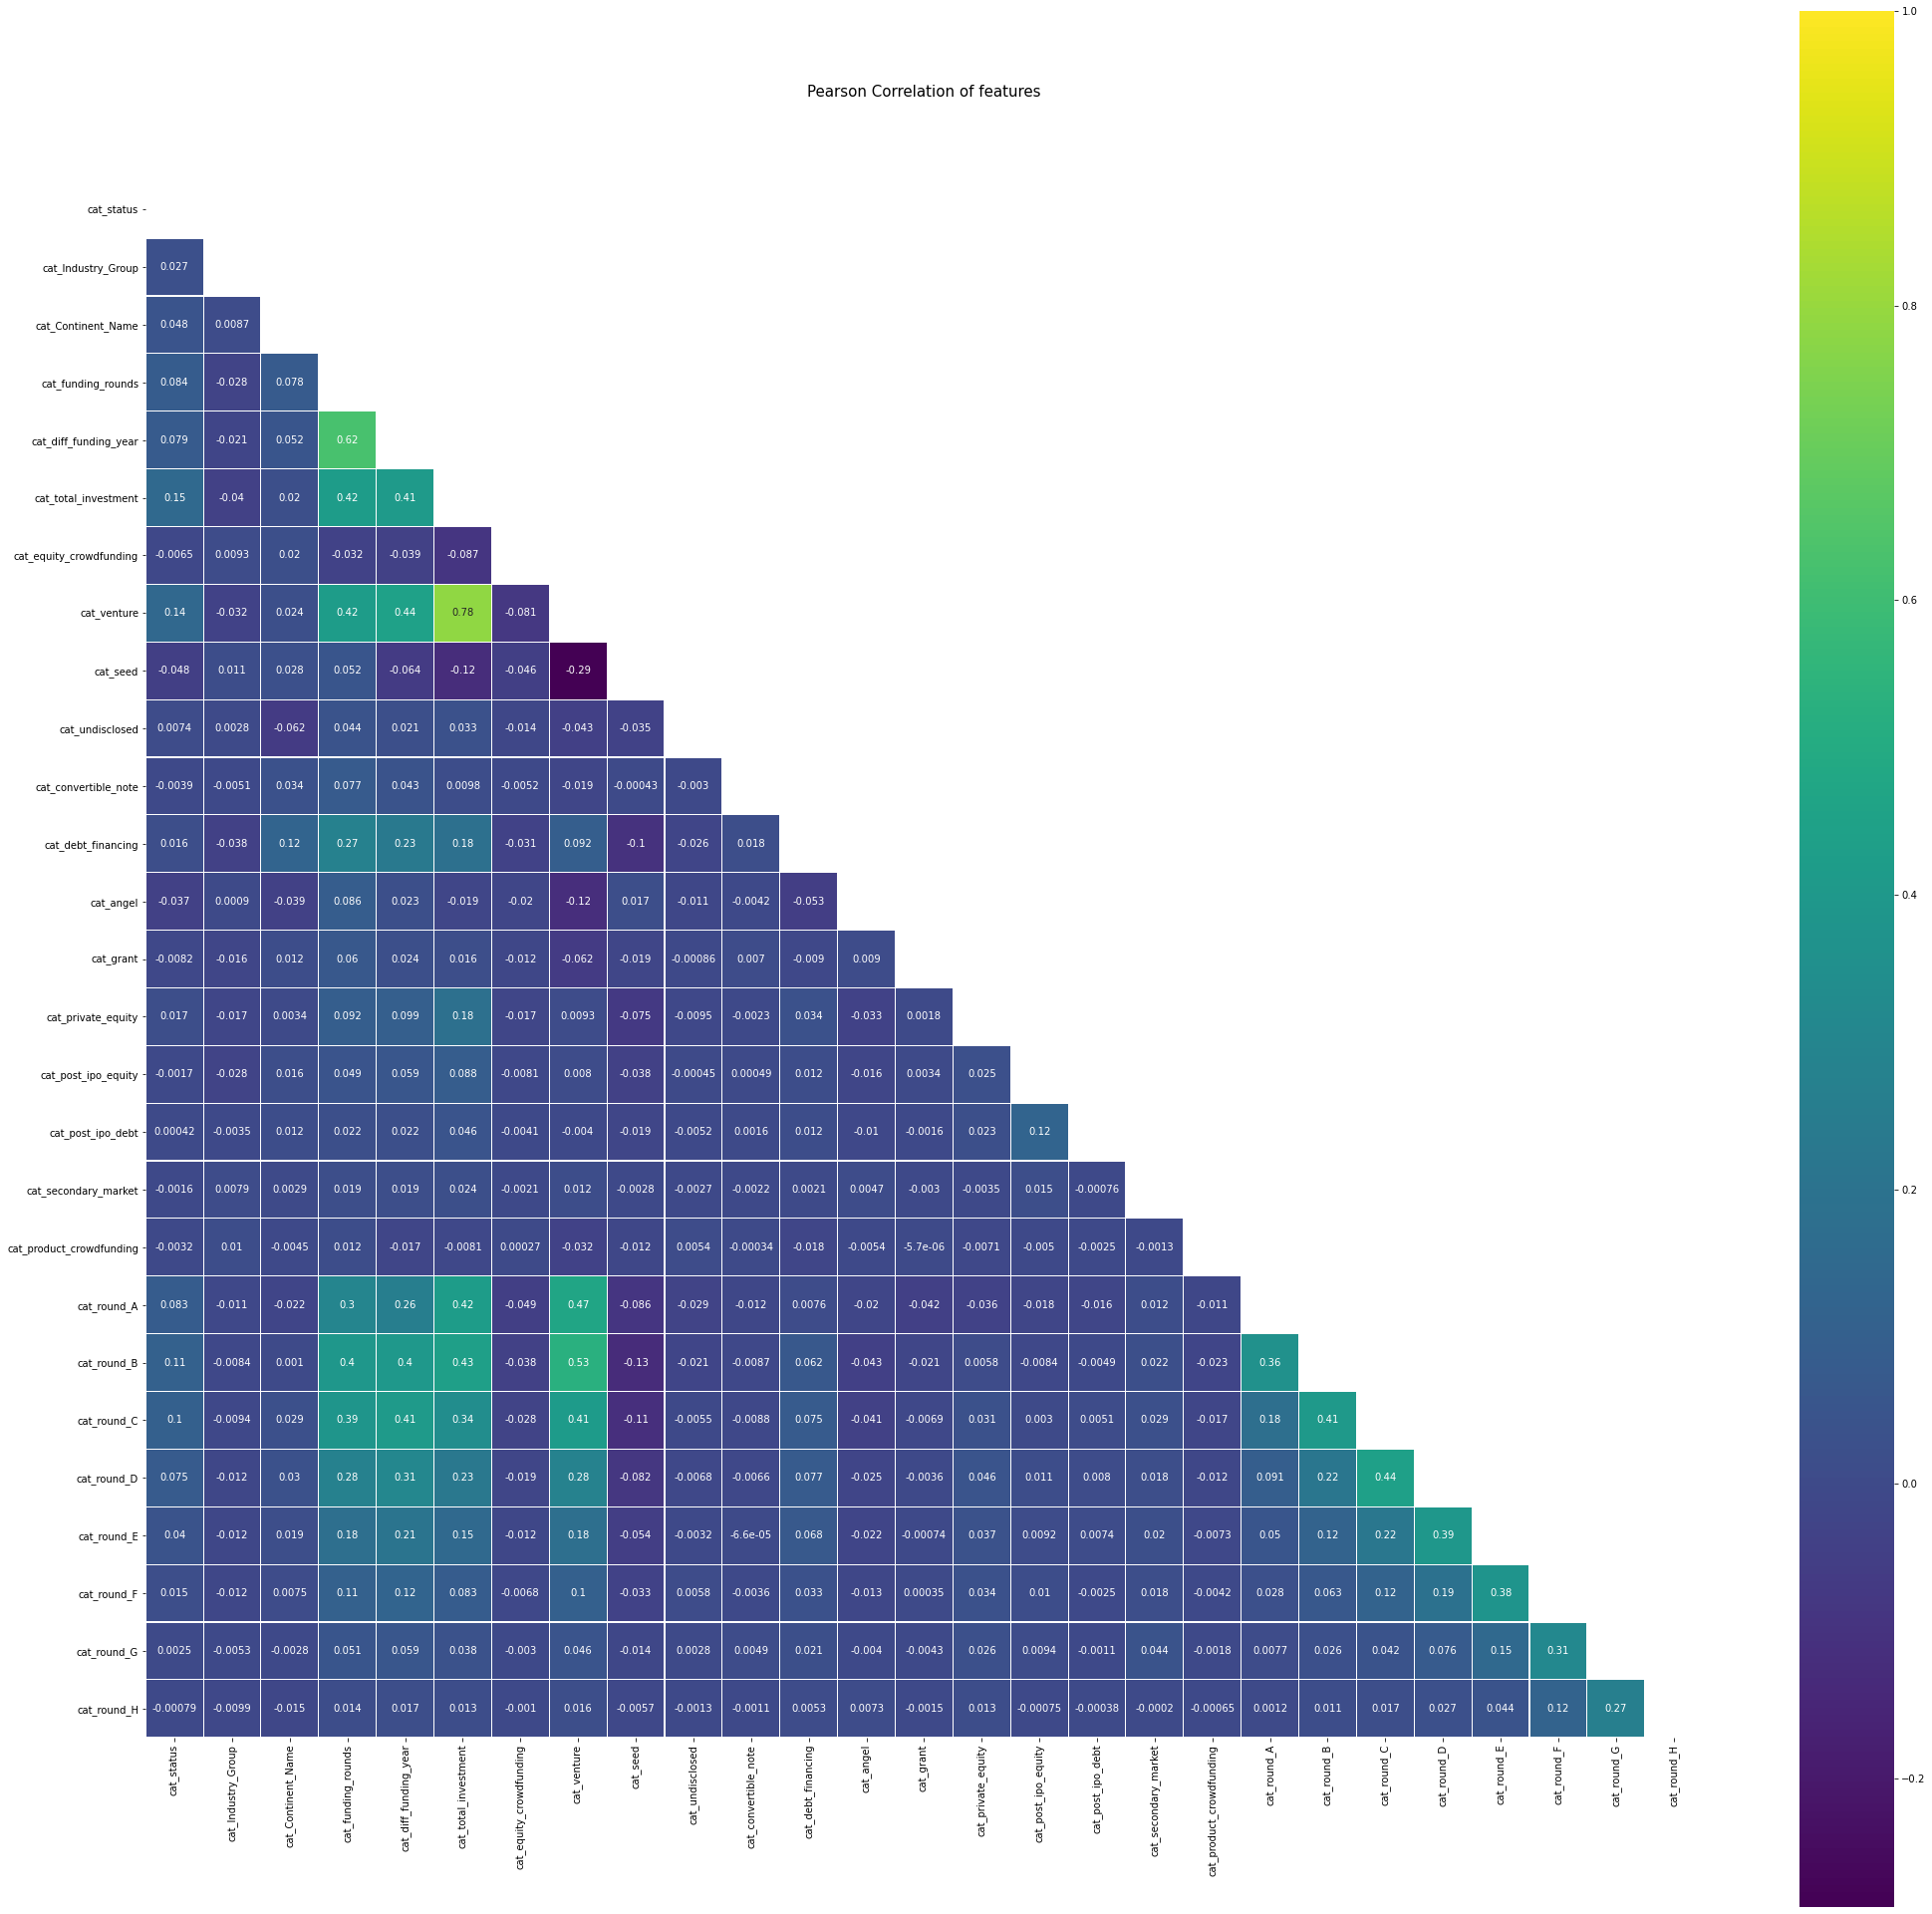

In [1288]:
#creating correlation matrix
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(df3.corr())
sns.heatmap(df3.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)

#you can remove cat_equity_crowdfunding, cat_undisclosed, cat_convertible_note, cat_grant , cat_post_ipo_equity, cat_post_ipo_debt, cat_secondary_market, cat_product_crowdfunding, cat_round_G, cat_round_H

In [1289]:
df3.columns

Index(['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment',
       'cat_equity_crowdfunding', 'cat_venture', 'cat_seed', 'cat_undisclosed',
       'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
       'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt',
       'cat_secondary_market', 'cat_product_crowdfunding', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F', 'cat_round_G', 'cat_round_H'],
      dtype='object')

In [1290]:
df3.shape

(40780, 27)

In [1412]:
df4 = df3[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']] # you can use this dataset for the model. Created after excluding columns with less correlation

df4.shape

(40780, 17)

In [1413]:
df4.head()

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,2,11,3,0,0,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,19,3,0,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,42,3,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,38,3,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,38,3,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


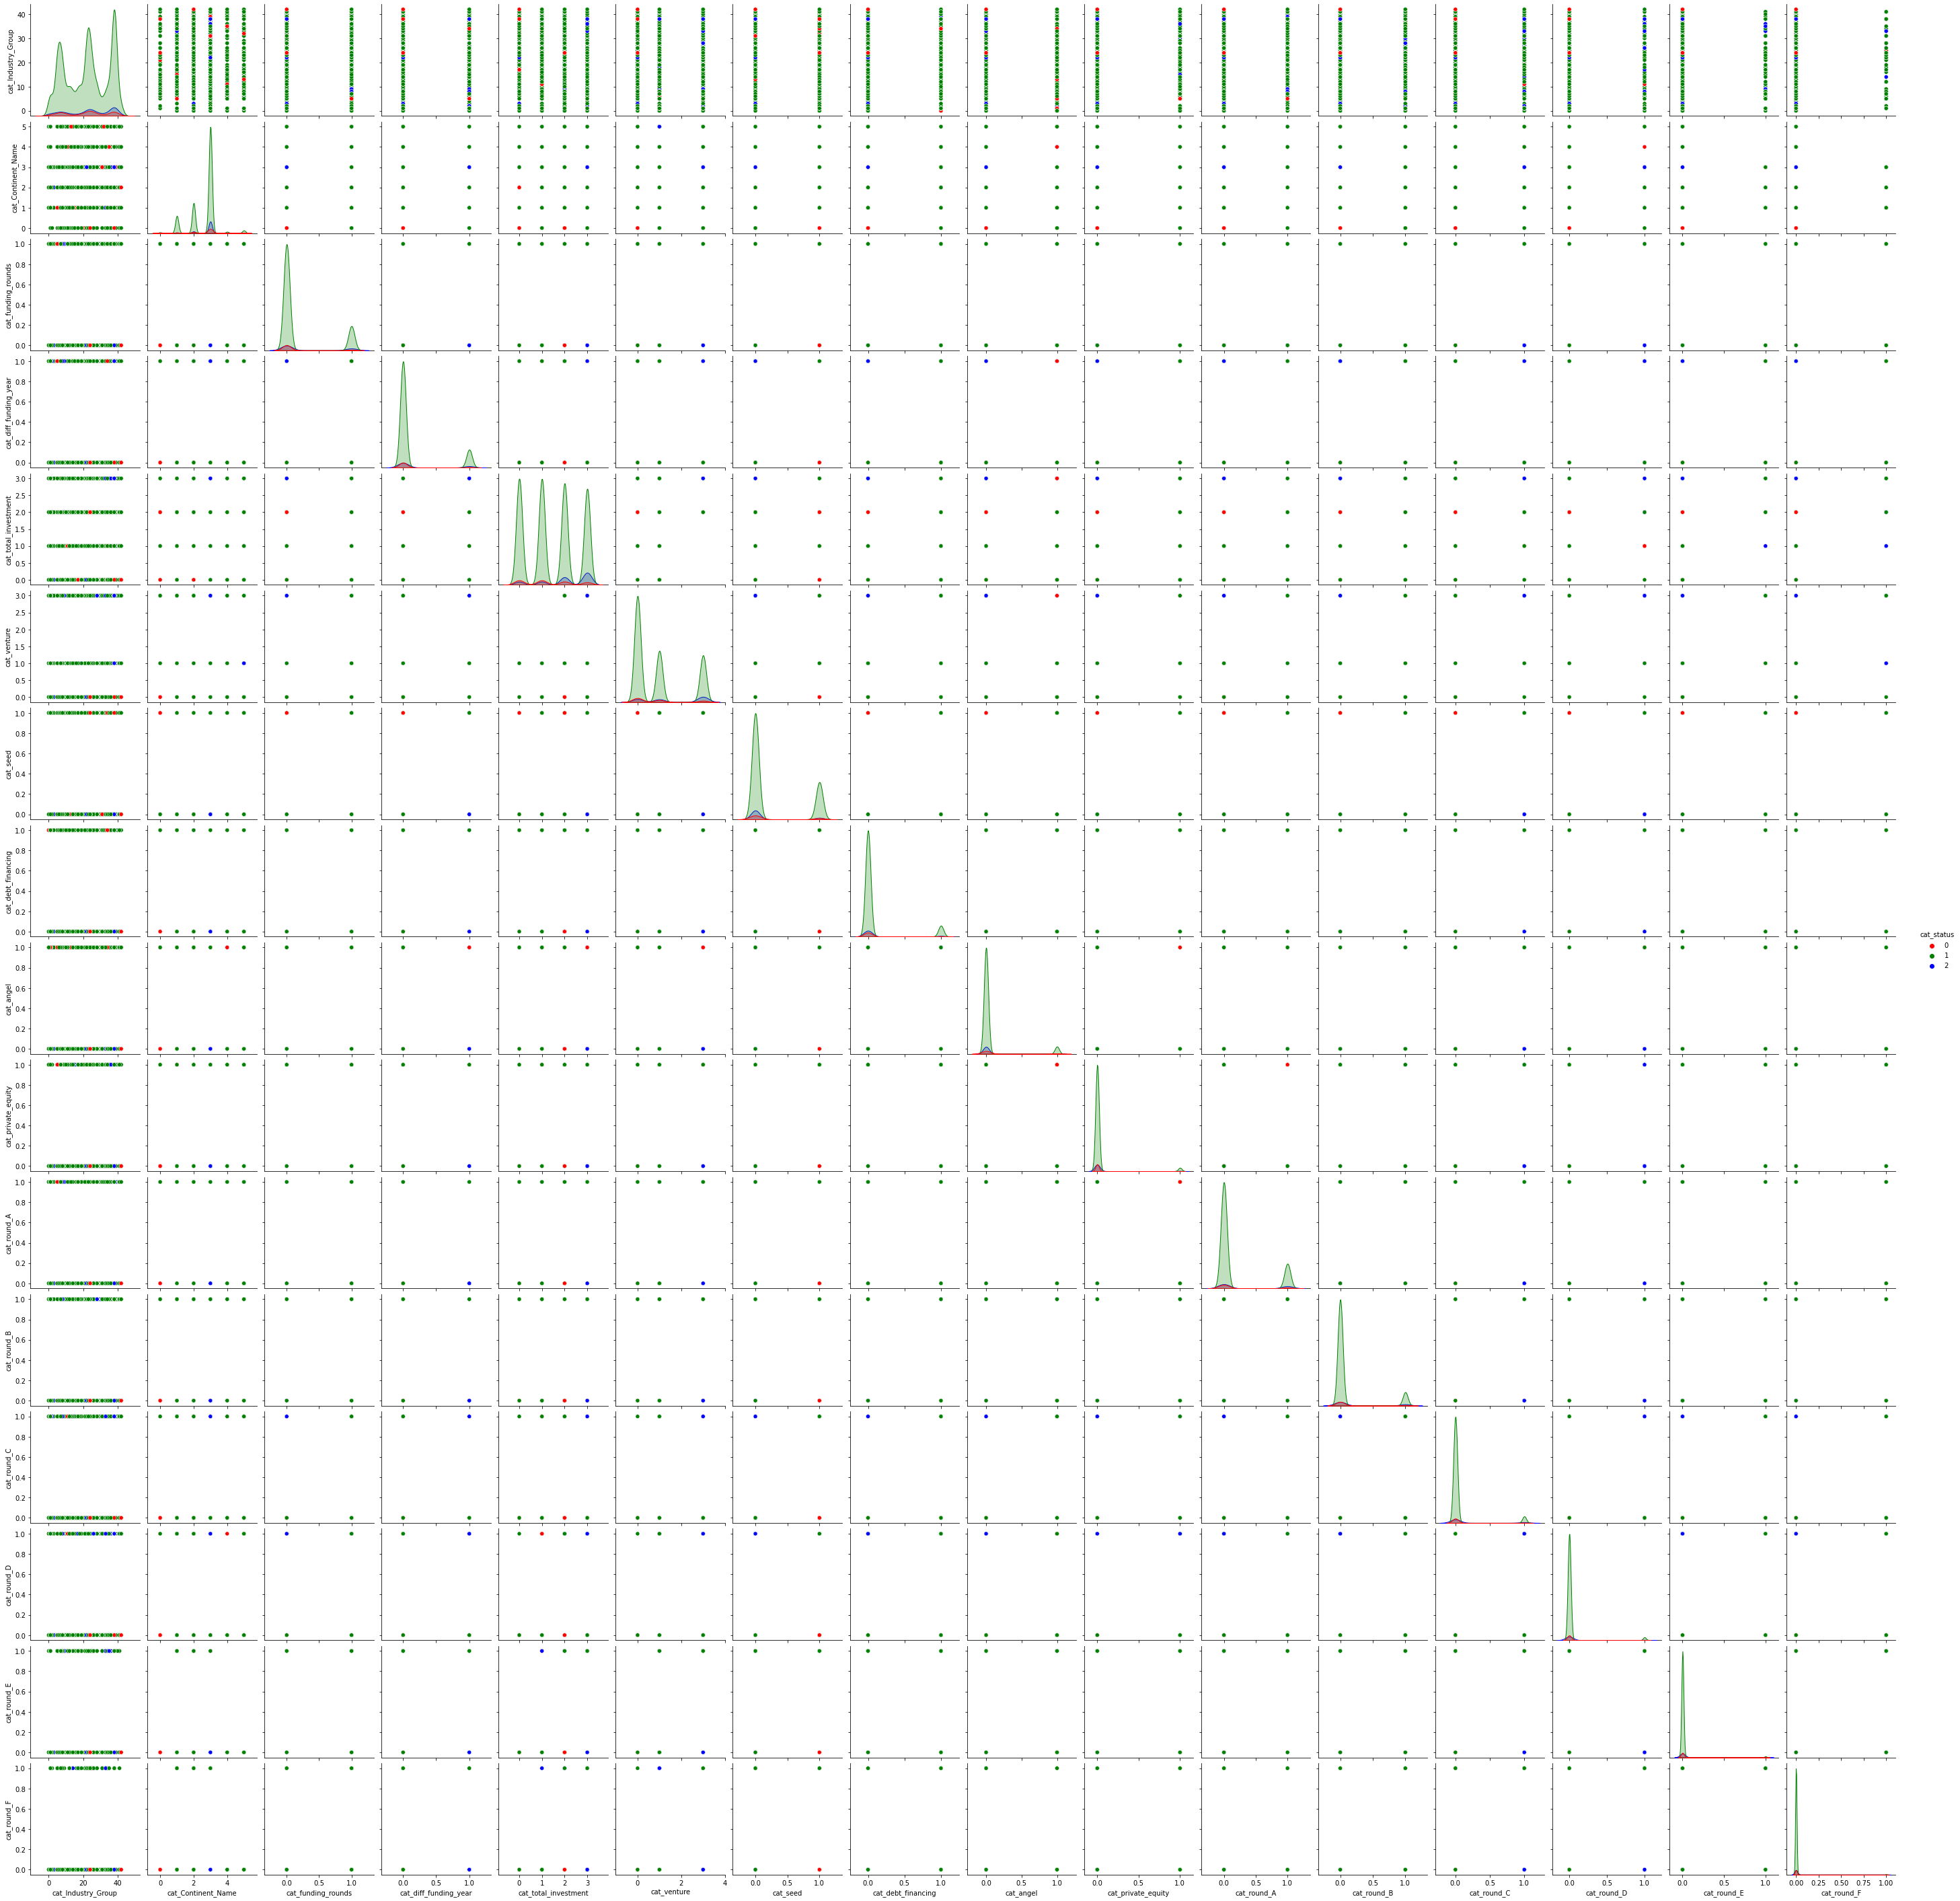

In [1292]:
sns.pairplot(df4, hue='cat_status',
                        palette={0 : 'red',
                                 1 : 'green',
                                 2 : 'blue'}) # pair plot with status

## Model Making
Decision Tree and Random Forest

In [1346]:
#Y = df4.iloc[:, 0].values
#X = df4.iloc[:, 1:17].values

Y = df4.cat_status
X = df4.drop('cat_status', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [1347]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (32624, 16)
Shape of X_test=> (8156, 16)
Shape of Y_train=> (32624,)
Shape of Y_test=> (8156,)


In [1349]:
#Building Decison tree
#dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
#dt.fit(X_train, Y_train)
#dt_pred_train = dt.predict(X_train)
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5) # using depth of 3 for simplicity
clf_pruned.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

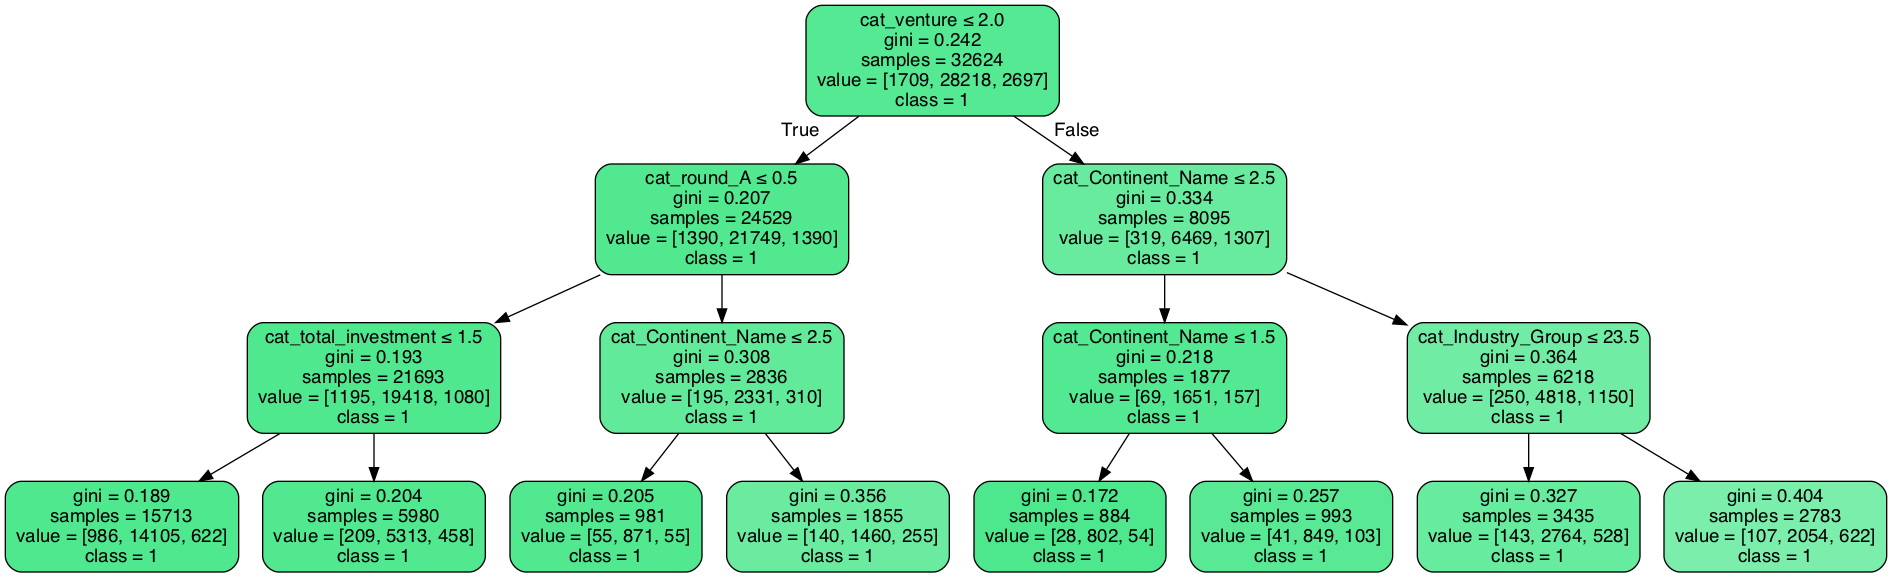

In [1350]:
# Evaluation on Training set
#dt_pred_train = dt.predict(X_train)
xvar = df4.drop('cat_status', axis=1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])

(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [1351]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print(accuracy_score(Y_test,preds_pruned))
print(accuracy_score(Y_train,preds_pruned_train))


0.8628003923491908
0.8649460519862677


In [1352]:

confusion = confusion_matrix(Y_test, preds_pruned)
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, preds_pruned)))

print('\nClassification Report\n')
print(classification_report(Y_test, preds_pruned, target_names=['Class 1', 'Class 2', 'Class 3']))


Confusion Matrix

[[   0  456    0]
 [   0 7037    0]
 [   0  663    0]]

Accuracy: 0.86


Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       456
     Class 2       0.86      1.00      0.93      7037
     Class 3       0.00      0.00      0.00       663

    accuracy                           0.86      8156
   macro avg       0.29      0.33      0.31      8156
weighted avg       0.74      0.86      0.80      8156



/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [1353]:
#Calculating feature importance
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head()#top 5 feature impacting decision tree split

,FeatureImportance
cat_venture,0.559992
cat_Continent_Name,0.212852
cat_round_A,0.110720
cat_Industry_Group,0.069581
cat_total_investment,0.046856


In [1354]:
feat_imp.sort_values(by=['FeatureImportance'], ascending=False)

,FeatureImportance
cat_venture,0.559992
cat_Continent_Name,0.212852
cat_round_A,0.110720
cat_Industry_Group,0.069581
cat_total_investment,0.046856
cat_funding_rounds,0.000000
cat_diff_funding_year,0.000000
cat_seed,0.000000
cat_debt_financing,0.000000
cat_angel,0.000000


## Dropping Operating value as a status

In [1425]:
#dropping operating value
df5 = df4.copy()
df5.drop(df5.index[df5['cat_status'] == 1], inplace = True)
df5 = df5.replace({'cat_status':2},1) # only 0 and 1, 0 means closed and 1 means acquired

In [1427]:
df5['cat_status'].count()

5525

In [1429]:
df5.shape

(5525, 17)

In [1430]:
Y5 = df5.cat_status
X5 = df5.drop('cat_status', axis = 1)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 42)

In [1431]:
clf_pruned5 = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5) # using depth of 3 for simplicity
clf_pruned5.fit(X_train5, Y_train5)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

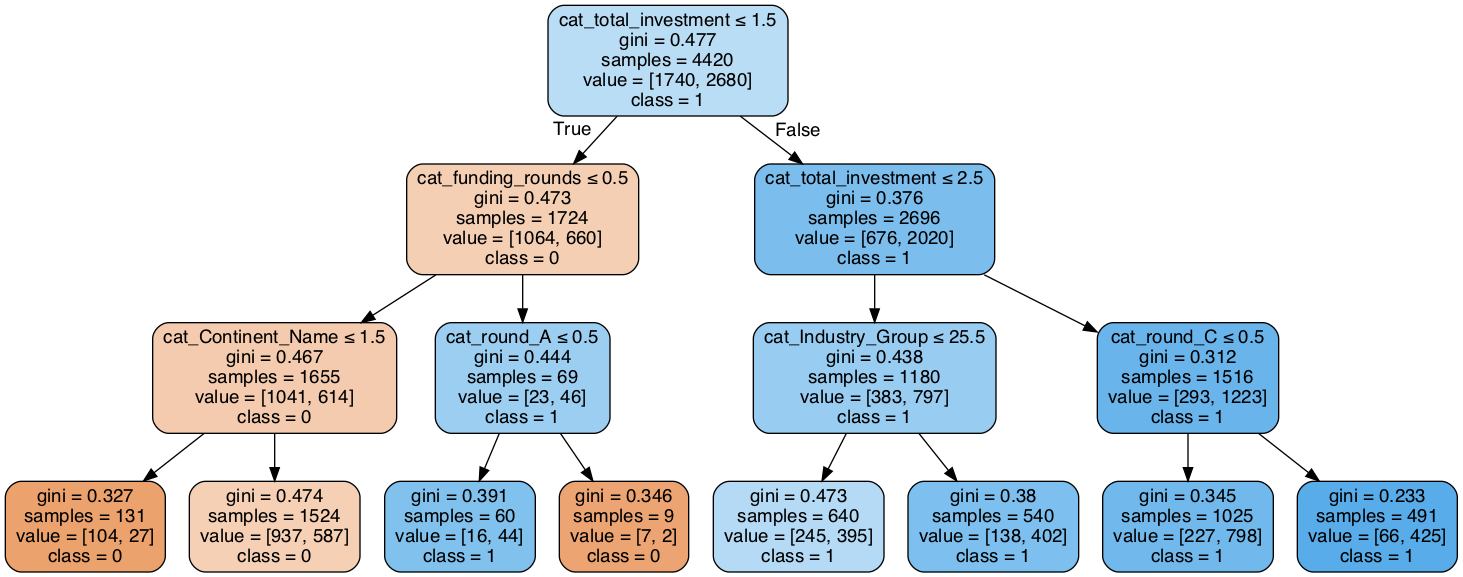

In [1432]:
xvar5 = df5.drop('cat_status', axis=1)
feature_cols5 = xvar5.columns
dot_data5 = StringIO()
export_graphviz(clf_pruned5, out_file=dot_data5,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols5,class_names=['0','1','2'])

(graph, ) = graph_from_dot_data(dot_data5.getvalue())
Image(graph.create_png())

In [1433]:
preds_pruned5 = clf_pruned5.predict(X_test5)
preds_pruned_train5 = clf_pruned5.predict(X_train5)

print(accuracy_score(Y_test5, preds_pruned5))

print(accuracy_score(Y_train5, preds_pruned_train5))


0.6877828054298643
0.7040723981900453


In [1434]:
confusion5 = confusion_matrix(Y_test5, preds_pruned5)
print('Confusion Matrix\n')
print(confusion5)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test5, preds_pruned5)))

print('\nClassification Report\n')
print(classification_report(Y_test5, preds_pruned5, target_names=['Class 1', 'Class 2']))

Confusion Matrix

[[238 187]
 [158 522]]

Accuracy: 0.69


Classification Report

              precision    recall  f1-score   support

     Class 1       0.60      0.56      0.58       425
     Class 2       0.74      0.77      0.75       680

    accuracy                           0.69      1105
   macro avg       0.67      0.66      0.67      1105
weighted avg       0.68      0.69      0.69      1105



In [1435]:
#Calculating feature importance
feat_importance5 = clf_pruned5.tree_.compute_feature_importances(normalize=False)
feat_imp_dict5 = dict(zip(feature_cols5, clf_pruned5.feature_importances_))
feat_imp5 = pd.DataFrame.from_dict(feat_imp_dict5, orient='index')
feat_imp5.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp5.sort_values(by=['FeatureImportance'], ascending=False).head()#top 5 feature impacting decision tree split

,FeatureImportance
cat_total_investment,0.889499
cat_funding_rounds,0.033746
cat_Industry_Group,0.027641
cat_Continent_Name,0.022541
cat_round_C,0.014658


In [1440]:
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth": range(1,20),
    "min_samples_split": range(1,20),
    "min_samples_leaf": range(1,10)
}

decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree,
                    param_grid = param_dict,
                    cv = 10, # cross validation method
                    verbose = 1,
                    n_jobs = -1) # set to use all processors


grid.fit(X_train5, Y_train5)

Fitting 10 folds for each of 6498 candidates, totalling 64980 fits


/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.69773756 0.69773756 ... 0.66402715 0.66357466 0.6638009 ]
  category=UserWarning


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 20)},
             verbose=1)

In [1441]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [1442]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [1443]:
grid.best_score_

0.7040723981900452

In [1447]:
clf_pruned5 = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=1, min_samples_split=2) 
clf_pruned5.fit(X_train5, Y_train5)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [1448]:
preds_pruned5 = clf_pruned5.predict(X_test5)
preds_pruned_train5 = clf_pruned5.predict(X_train5)
print(accuracy_score(Y_test5,preds_pruned5))
print(accuracy_score(Y_train5,preds_pruned_train5))

0.6877828054298643
0.7040723981900453


In [1449]:
confusion5 = confusion_matrix(Y_test5, preds_pruned5)
print('Confusion Matrix\n')
print(confusion5)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test5, preds_pruned5)))

print('\nClassification Report\n')
print(classification_report(Y_test5, preds_pruned5, target_names=['Class 1', 'Class 2']))

Confusion Matrix

[[238 187]
 [158 522]]

Accuracy: 0.69


Classification Report

              precision    recall  f1-score   support

     Class 1       0.60      0.56      0.58       425
     Class 2       0.74      0.77      0.75       680

    accuracy                           0.69      1105
   macro avg       0.67      0.66      0.67      1105
weighted avg       0.68      0.69      0.69      1105



## Closed and Acquired Upsampled

In [ ]:
#oversampling to fix data imbalance
# concatenate our training data back together. 
X_1 = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
closed = X_1[X_1.cat_status==0]
operating = X_1[X_1.cat_status==1]
acquired = X_1[X_1.cat_status==2]

# upsample minority
closed_upsampled = resample(closed,
                          replace=True, # sample with replacement
                          n_samples=len(operating), # match number in majority class
                          random_state=27) # reproducible results

acquired_upsampled = resample(acquired,
                          replace=True, # sample with replacement
                          n_samples=len(operating), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([closed_upsampled, operating, acquired_upsampled])

# check new class counts
upsampled.cat_status.value_counts()

In [1363]:
# trying decision tree with the balanced dataset
y_train_upsampled = upsampled.cat_status
X_train_upsampled = upsampled.drop('cat_status', axis=1)

In [1366]:
#upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
#upsampled_pred = upsampled.predict(X_test)


clf_pruned_upsampled = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5) # using depth of 3 for simplicity
clf_pruned_upsampled.fit(X_train_upsampled, y_train_upsampled)
preds_pruned_upsampled = clf_pruned_upsampled.predict(X_test)

In [1368]:
# Checking accuracy
print('accuracy score:', accuracy_score(Y_test, preds_pruned_upsampled))

print('Confusion Matrix\n')
print(confusion_matrix(Y_test, preds_pruned_upsampled))

print('\nClassification Report\n')
print(classification_report(Y_test, preds_pruned_upsampled, target_names=['Class 1', 'Class 2', 'Class 3']))
#this underperformed

accuracy score: 0.2329573320255027
Confusion Matrix

[[ 253   49  154]
 [3490 1249 2298]
 [ 162  103  398]]

Classification Report

              precision    recall  f1-score   support

     Class 1       0.06      0.55      0.12       456
     Class 2       0.89      0.18      0.30      7037
     Class 3       0.14      0.60      0.23       663

    accuracy                           0.23      8156
   macro avg       0.37      0.44      0.21      8156
weighted avg       0.78      0.23      0.28      8156



## Operating Downsampled to acquired value - BEST WAY

In [1389]:
#Testing with undersampled majority
# downsample majority
operating_downsampled = resample(operating,
                                replace = False, # sample without replacement
                                n_samples = len(acquired), # match minority n
                                random_state = 27) # reproducible results


# combine minority and downsampled majority
downsampled = pd.concat([closed, operating_downsampled, acquired])

# checking counts
downsampled.cat_status.value_counts()

1    2697
2    2697
0    1709
Name: cat_status, dtype: int64

In [1390]:
# trying decision tree with the balanced dataset
y_train_downsampled = downsampled.cat_status
X_train_downsampled = downsampled.drop('cat_status', axis=1)

clf_pruned_downsampled = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5) # using depth of 3 for simplicity
clf_pruned_downsampled.fit(X_train_downsampled, y_train_downsampled)
preds_pruned_downsampled = clf_pruned_downsampled.predict(X_test)

In [1391]:
# Checking accuracy
print('accuracy score:', accuracy_score(Y_test, preds_pruned_downsampled))

print('Confusion Matrix\n')
print(confusion_matrix(Y_test, preds_pruned_downsampled))

print('\nClassification Report\n')
print(classification_report(Y_test, preds_pruned_downsampled, target_names=['Class 1', 'Class 2', 'Class 3']))


accuracy score: 0.583864639529181
Confusion Matrix

[[  29  281  146]
 [ 290 4332 2415]
 [  15  247  401]]

Classification Report

              precision    recall  f1-score   support

     Class 1       0.09      0.06      0.07       456
     Class 2       0.89      0.62      0.73      7037
     Class 3       0.14      0.60      0.22       663

    accuracy                           0.58      8156
   macro avg       0.37      0.43      0.34      8156
weighted avg       0.78      0.58      0.65      8156



In [1398]:
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
}

decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree,
                    param_grid = param_dict,
                    cv = 10, # cross validation method
                    verbose = 1,
                    n_jobs = -1) # set to use all processors

grid.fit(X_train_downsampled, y_train_downsampled)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/Users/priankaball/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.48275193 0.48275193 0.48275193 0.48275193 0.48275193
 0.48275193 0.48275193 0.48275193        nan 0.48275193 0.48275193
 0.48275193 0.48275193 0.48275193 0.48275193 0.48275193 0.48275193
        nan 0.48275193 0.48275193 0.48275193 0.48275193 0.48275193
 0.48275193 0.48275193 0.48275193        nan 0.48275193 0.48275193
 0.48275193 0.48275193 0.48275193 0.48275193 0.48275193 0.48275193
        nan 0.48796102 0.48796102 0.48796102 0.48796102 0.48796102
 0.48796102 0.48796102 0.48796102        nan 0.48796102 0.48796102
 0.48796102 0.48796102 0.48796102 0.48796102 0.48796102 0.48796102
        nan 0.48796102 0.48796102 0.48796102 0.48796102 0.48796102
 0.48796102 0.48796102 0.48796102        nan 0.48796102 0.48796102
 0.48796102 0.48796102 0.48796102 0.48796102 0.48796102 0.48796102
        nan 0.49739486 0

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [1399]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [1400]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=9)

In [1401]:
grid.best_score_

0.5037287296210455

In [1403]:
# trying decision tree with the balanced dataset
y_train_downsampled = downsampled.cat_status
X_train_downsampled = downsampled.drop('cat_status', axis=1)

clf_pruned_downsampled = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=9, min_samples_leaf=4, min_samples_split=9) # using depth of 3 for simplicity
clf_pruned_downsampled.fit(X_train_downsampled, y_train_downsampled)
preds_pruned_downsampled = clf_pruned_downsampled.predict(X_test)

In [1404]:
# Checking accuracy
print('accuracy score:', accuracy_score(Y_test, preds_pruned_downsampled))

print('Confusion Matrix\n')
print(confusion_matrix(Y_test, preds_pruned_downsampled))

print('\nClassification Report\n')
print(classification_report(Y_test, preds_pruned_downsampled, target_names=['Class 1', 'Class 2', 'Class 3']))

accuracy score: 0.5708680725846003
Confusion Matrix

[[ 106  230  120]
 [ 948 4179 1910]
 [  78  214  371]]

Classification Report

              precision    recall  f1-score   support

     Class 1       0.09      0.23      0.13       456
     Class 2       0.90      0.59      0.72      7037
     Class 3       0.15      0.56      0.24       663

    accuracy                           0.57      8156
   macro avg       0.38      0.46      0.36      8156
weighted avg       0.80      0.57      0.65      8156



## Operating Downsampled to closed value

In [1385]:
#Testing with undersampled majority
# downsample majority
operating_downsampled_c = resample(operating,
                                replace = False, # sample without replacement
                                n_samples = len(closed), # match minority n
                                random_state = 27) # reproducible results


# combine minority and downsampled majority
downsampled_c = pd.concat([closed, operating_downsampled_c, acquired])

# checking counts
downsampled_c.cat_status.value_counts()

2    2697
0    1709
1    1709
Name: cat_status, dtype: int64

In [1386]:
# trying decision tree with the balanced dataset
y_train_downsampled_c = downsampled_c.cat_status
X_train_downsampled_c = downsampled_c.drop('cat_status', axis=1)

clf_pruned_downsampled_c = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5) # using depth of 3 for simplicity
clf_pruned_downsampled_c.fit(X_train_downsampled_c, y_train_downsampled_c)
preds_pruned_downsampled_c = clf_pruned_downsampled.predict(X_test)

In [1387]:
# Checking accuracy
print('accuracy score:', accuracy_score(Y_test, preds_pruned_downsampled_c))

print('Confusion Matrix\n')
print(confusion_matrix(Y_test, preds_pruned_downsampled_c))

print('\nClassification Report\n')
print(classification_report(Y_test, preds_pruned_downsampled_c, target_names=['Class 1', 'Class 2', 'Class 3']))

accuracy score: 0.583864639529181
Confusion Matrix

[[  29  281  146]
 [ 290 4332 2415]
 [  15  247  401]]

Classification Report

              precision    recall  f1-score   support

     Class 1       0.09      0.06      0.07       456
     Class 2       0.89      0.62      0.73      7037
     Class 3       0.14      0.60      0.22       663

    accuracy                           0.58      8156
   macro avg       0.37      0.43      0.34      8156
weighted avg       0.78      0.58      0.65      8156



## Operating and Acquired Downsampled

In [1377]:
#Testing with undersampled the two majorities
# downsample 2 majority
operating_downsampled2 = resample(operating,
                                replace = False, # sample without replacement
                                n_samples = len(closed), # match minority n
                                random_state = 27) # reproducible results

acquired_downsampled2 = resample(acquired,
                                replace = False, # sample without replacement
                                n_samples = len(closed), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled2 = pd.concat([closed, operating_downsampled2, acquired_downsampled2])

# checking counts
downsampled2.cat_status.value_counts()

0    1709
1    1709
2    1709
Name: cat_status, dtype: int64

In [1378]:
# trying decision tree with the balanced dataset
y_train_downsampled2 = downsampled2.cat_status
X_train_downsampled2 = downsampled2.drop('cat_status', axis=1)

clf_pruned_downsampled2 = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5) # using depth of 3 for simplicity
clf_pruned_downsampled2.fit(X_train_downsampled2, y_train_downsampled2)
preds_pruned_downsampled2 = clf_pruned_downsampled2.predict(X_test)

In [1379]:
# Checking accuracy
print('accuracy score:', accuracy_score(Y_test, preds_pruned_downsampled2))

print('Confusion Matrix\n')
print(confusion_matrix(Y_test, preds_pruned_downsampled2))

print('\nClassification Report\n')
print(classification_report(Y_test, preds_pruned_downsampled2, target_names=['Class 1', 'Class 2', 'Class 3']))

accuracy score: 0.2466895537027955
Confusion Matrix

[[ 256   83  117]
 [3528 1404 2105]
 [ 165  146  352]]

Classification Report

              precision    recall  f1-score   support

     Class 1       0.06      0.56      0.12       456
     Class 2       0.86      0.20      0.32      7037
     Class 3       0.14      0.53      0.22       663

    accuracy                           0.25      8156
   macro avg       0.35      0.43      0.22      8156
weighted avg       0.76      0.25      0.30      8156



## Operating Downsample and Closed Upsample

In [1382]:
#downsample and upsampled togather

operating_downsampled = resample(operating,
                                replace = False, # sample without replacement
                                n_samples = len(acquired), # match minority n
                                random_state = 27) # reproducible results

closed_upsampled = resample(closed,
                                replace = True, # sample without replacement
                                n_samples = len(acquired), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled_upsampled = pd.concat([closed_upsampled, operating_downsampled, acquired])

# checking counts
downsampled_upsampled.cat_status.value_counts()

0    2697
1    2697
2    2697
Name: cat_status, dtype: int64

In [1383]:
# trying decision tree with the balanced dataset
y_train_downsampled_upsampled = downsampled_upsampled.cat_status
X_train_downsampled_upsampled = downsampled_upsampled.drop('cat_status', axis=1)

clf_pruned_downsampled_upsampled = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5) # using depth of 3 for simplicity
clf_pruned_downsampled_upsampled.fit(X_train_downsampled_upsampled, y_train_downsampled_upsampled)
preds_pruned_downsampled_upsampled = clf_pruned_downsampled_upsampled.predict(X_test)

In [1384]:
# Checking accuracy
print('accuracy score:', accuracy_score(Y_test, preds_pruned_downsampled_upsampled))

print('Confusion Matrix\n')
print(confusion_matrix(Y_test, preds_pruned_downsampled_upsampled))

print('\nClassification Report\n')
print(classification_report(Y_test, preds_pruned_downsampled_upsampled, target_names=['Class 1', 'Class 2', 'Class 3']))

accuracy score: 0.1971554683668465
Confusion Matrix

[[ 259   51  146]
 [3674  948 2415]
 [ 176   86  401]]

Classification Report

              precision    recall  f1-score   support

     Class 1       0.06      0.57      0.11       456
     Class 2       0.87      0.13      0.23      7037
     Class 3       0.14      0.60      0.22       663

    accuracy                           0.20      8156
   macro avg       0.36      0.44      0.19      8156
weighted avg       0.77      0.20      0.23      8156



# Random Forest

In [1486]:
Y = df4.cat_status
X = df4.drop('cat_status', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [1452]:
Y5 = df5.cat_status
X5 = df5.drop('cat_status', axis = 1)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 42)

In [1471]:
rfc5 = RandomForestClassifier(criterion = 'gini', random_state = 42)
rfc5.fit(X_train5, Y_train5) # using df5

RandomForestClassifier(random_state=42)

In [1484]:
rfc_pred_test5 = rfc5.predict(X_test5)
print(classification_report(Y_test5, rfc_pred_test5, target_names=['Class 1', 'Class 2']))

              precision    recall  f1-score   support

     Class 1       0.58      0.55      0.57       425
     Class 2       0.73      0.75      0.74       680

    accuracy                           0.68      1105
   macro avg       0.66      0.65      0.65      1105
weighted avg       0.67      0.68      0.67      1105



In [1491]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [1494]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train5, Y_train5)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [1495]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [1500]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test5, Y_test5)
print(random_accuracy)

Model Performance
Average Error: 0.3086 degrees.
Accuracy = -inf%.
-inf


In [1487]:
rfc = RandomForestClassifier(criterion = 'gini', random_state = 42)
rfc.fit(X_train, Y_train) # using df5

RandomForestClassifier(random_state=42)

In [1489]:
rfc_pred_test = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       456
     Class 2       0.87      0.98      0.92      7037
     Class 3       0.23      0.06      0.10       663

    accuracy                           0.85      8156
   macro avg       0.37      0.35      0.34      8156
weighted avg       0.77      0.85      0.80      8156

